In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Igbojaiye.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      20.8      33.5        1.82        9.974444         17.80704   
1979-02-01      20.8      35.0        1.72        9.719444         18.67968   
1979-03-01      22.3      34.9        2.13        9.694167         19.50912   
1979-04-01      22.0      33.1        2.28        9.590556         18.41184   
1979-05-01      21.1      31.0        1.65        9.951389         19.32768   
1979-06-01      20.2      29.1        1.69        8.791111         14.51520   
1979-07-01      20.1      27.8        1.75        7.968333         12.26016   

             ETo  
Date              
1979-01-01  4.73  
1979-02-01  5.05  
1979-03-01  5.43  
1979-04-01  5.09  
1979-05-01  4.56  
1979-06-01  3.66  
1979-07-01  3.23

### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

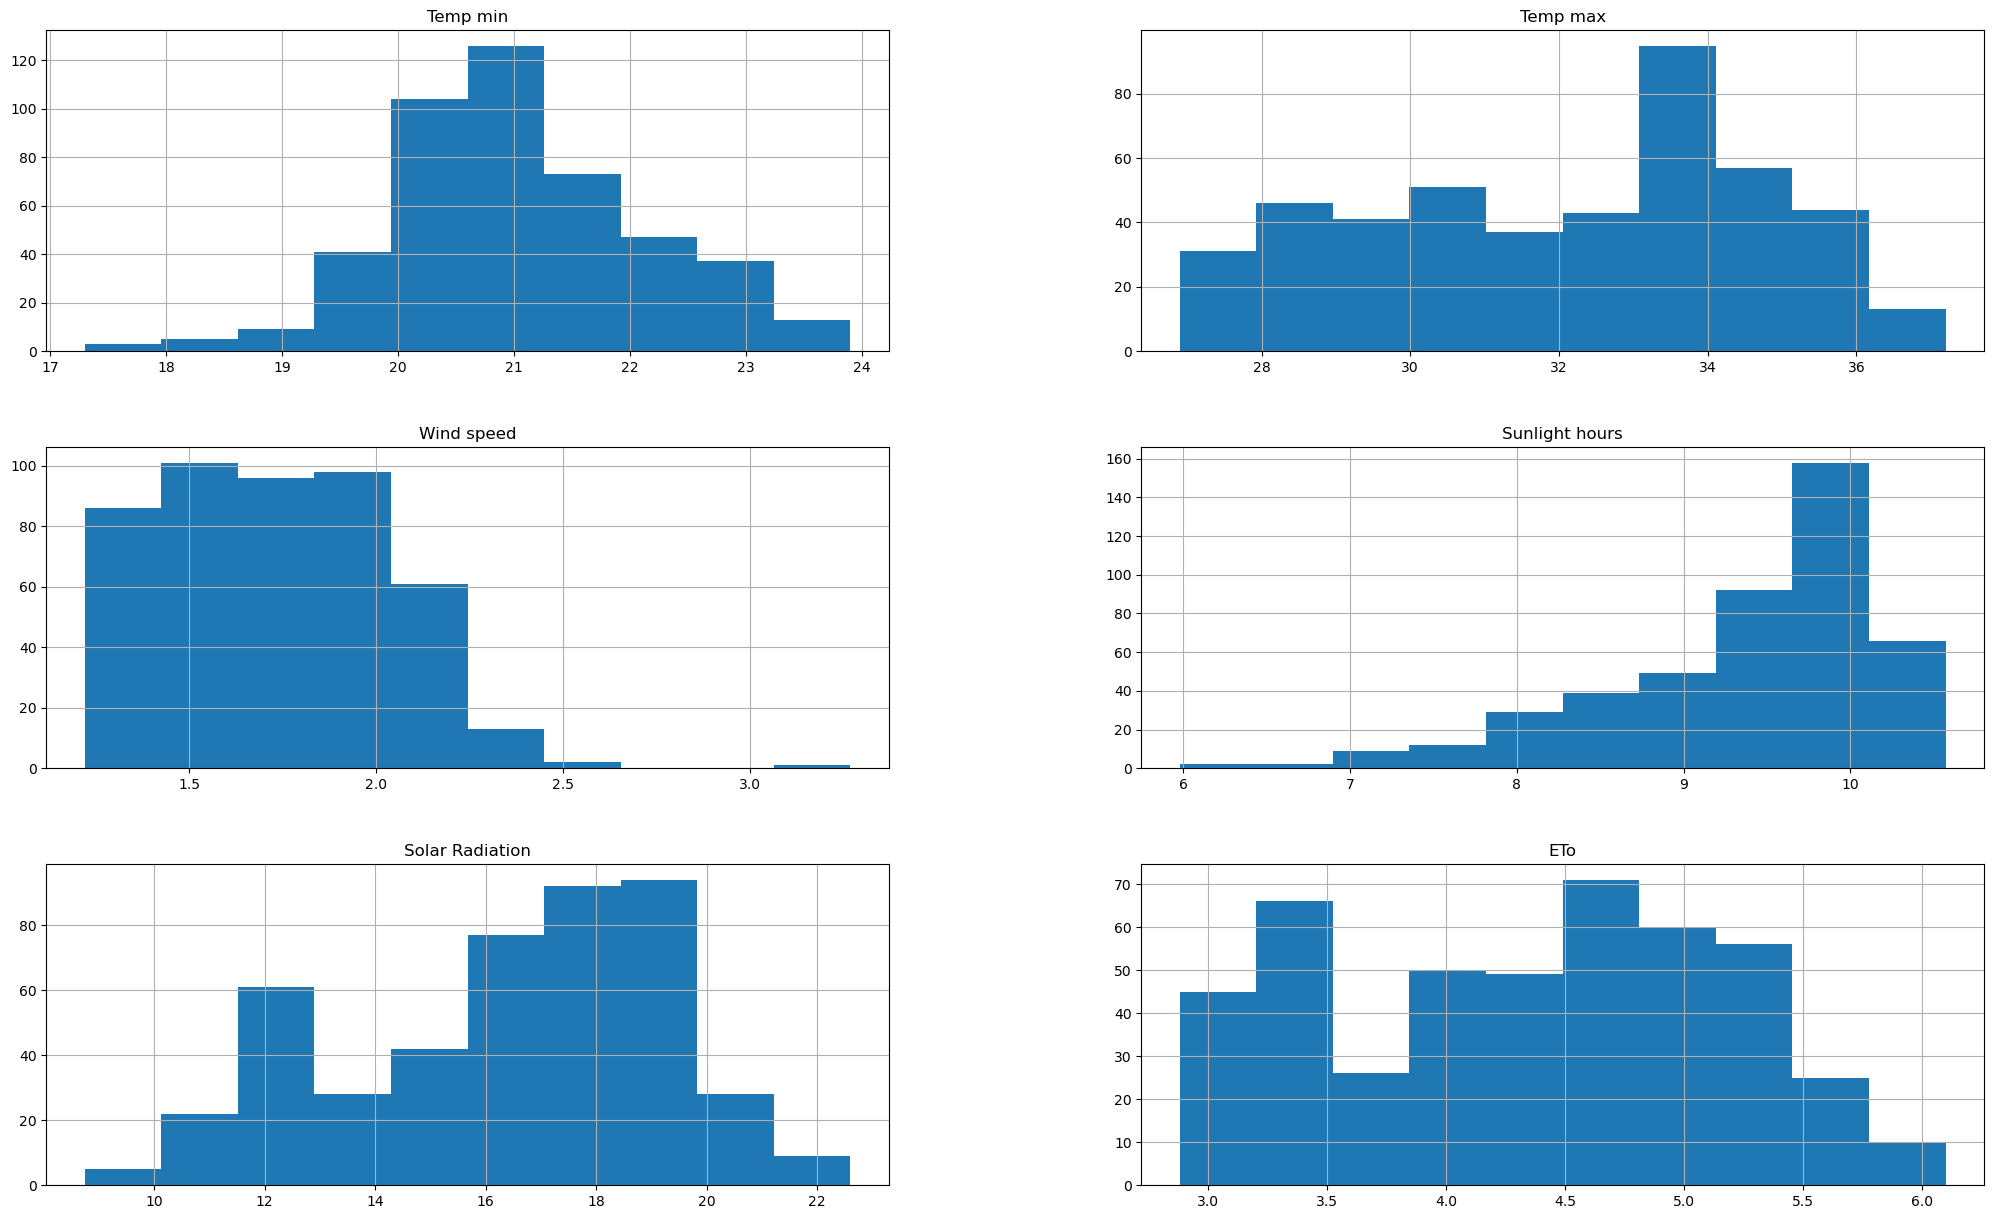

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

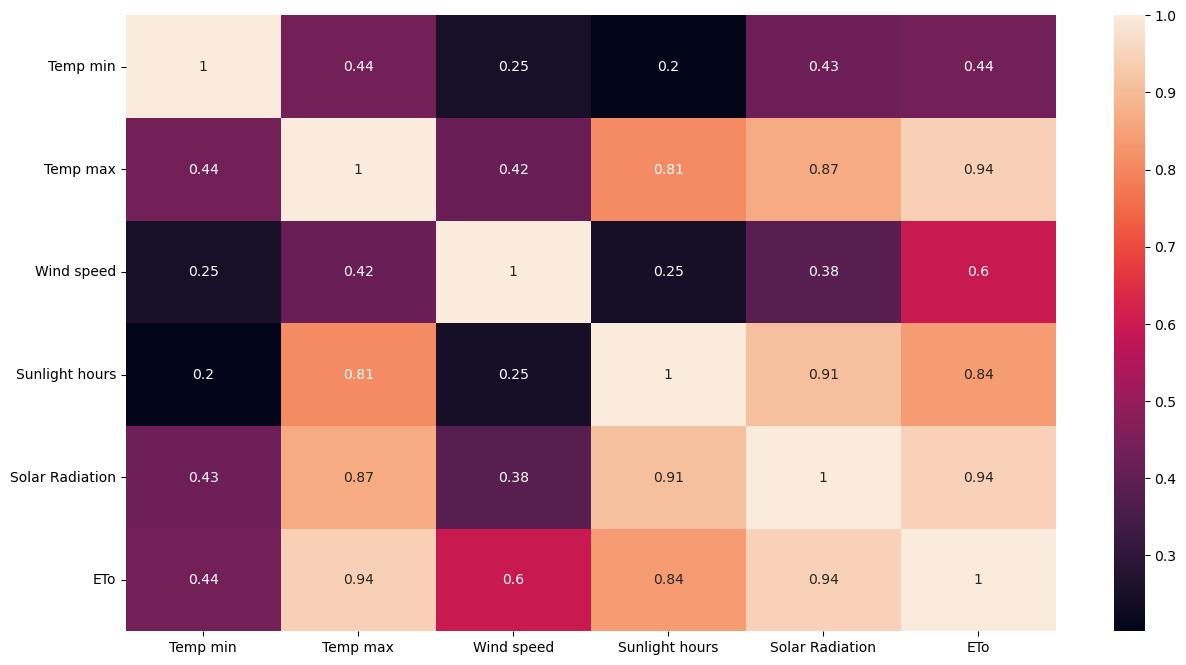

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

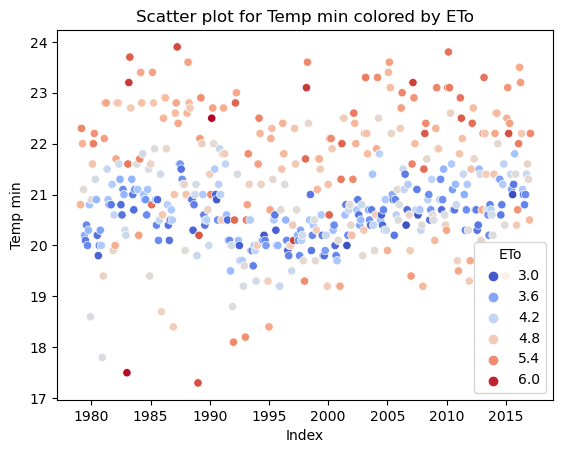

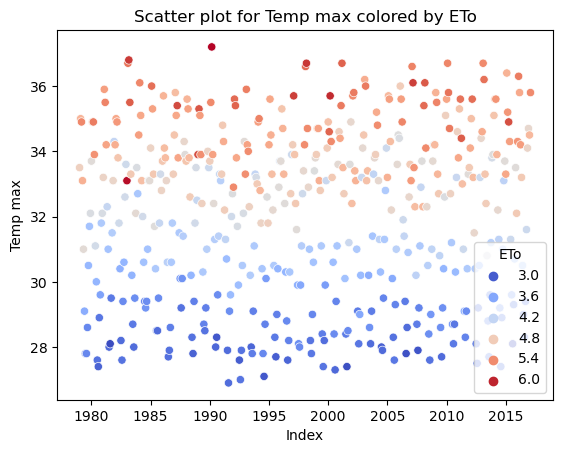

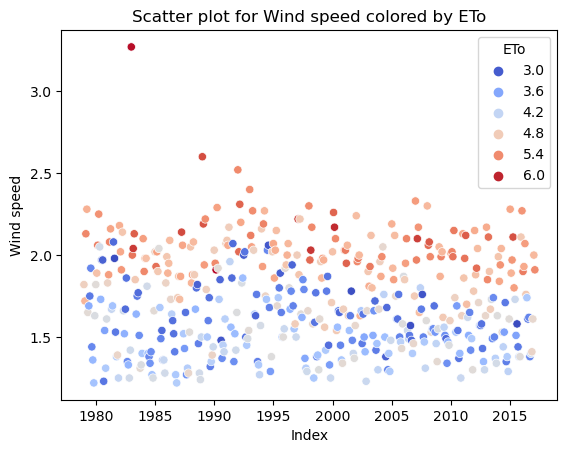

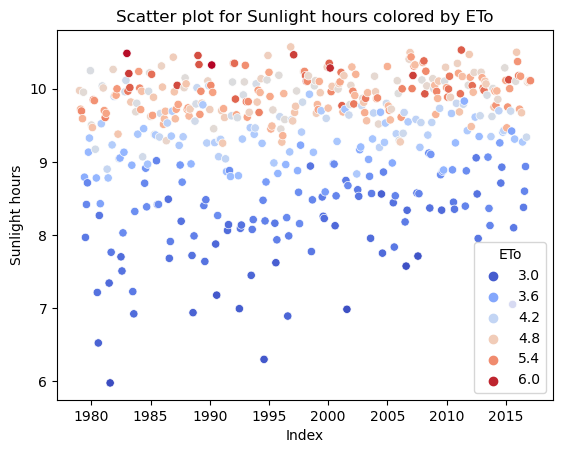

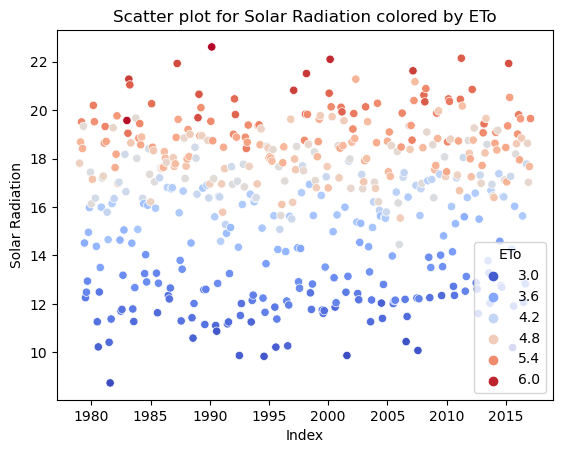

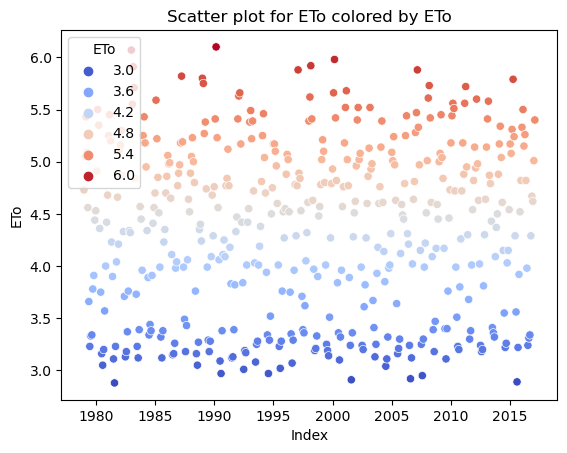

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

In [ ]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [7]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [8]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


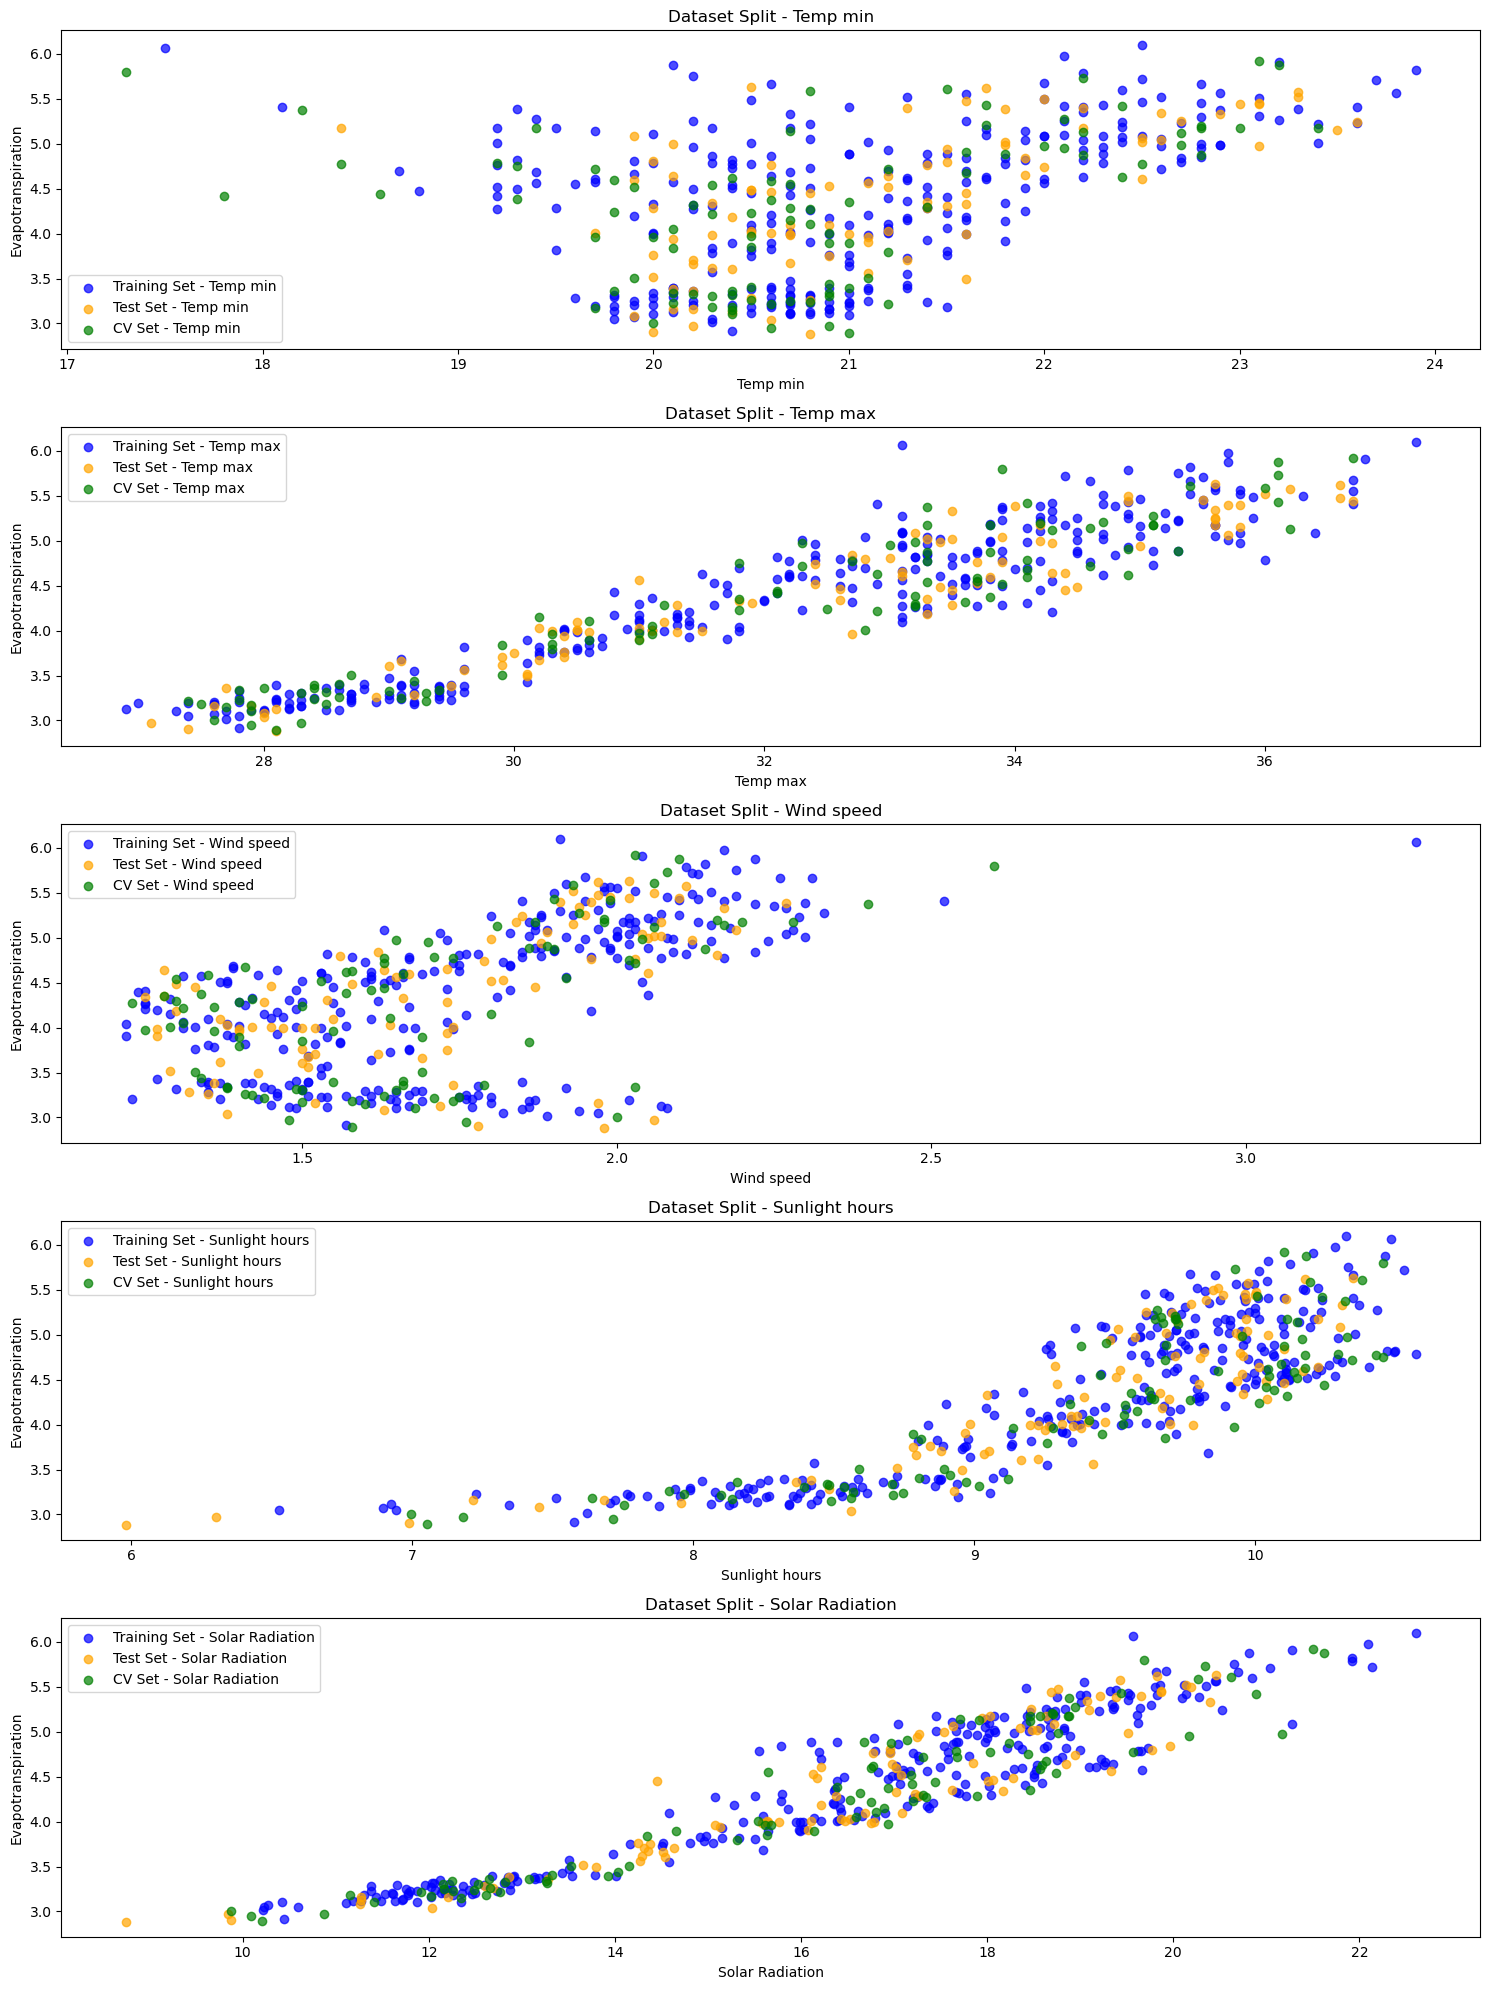

In [9]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

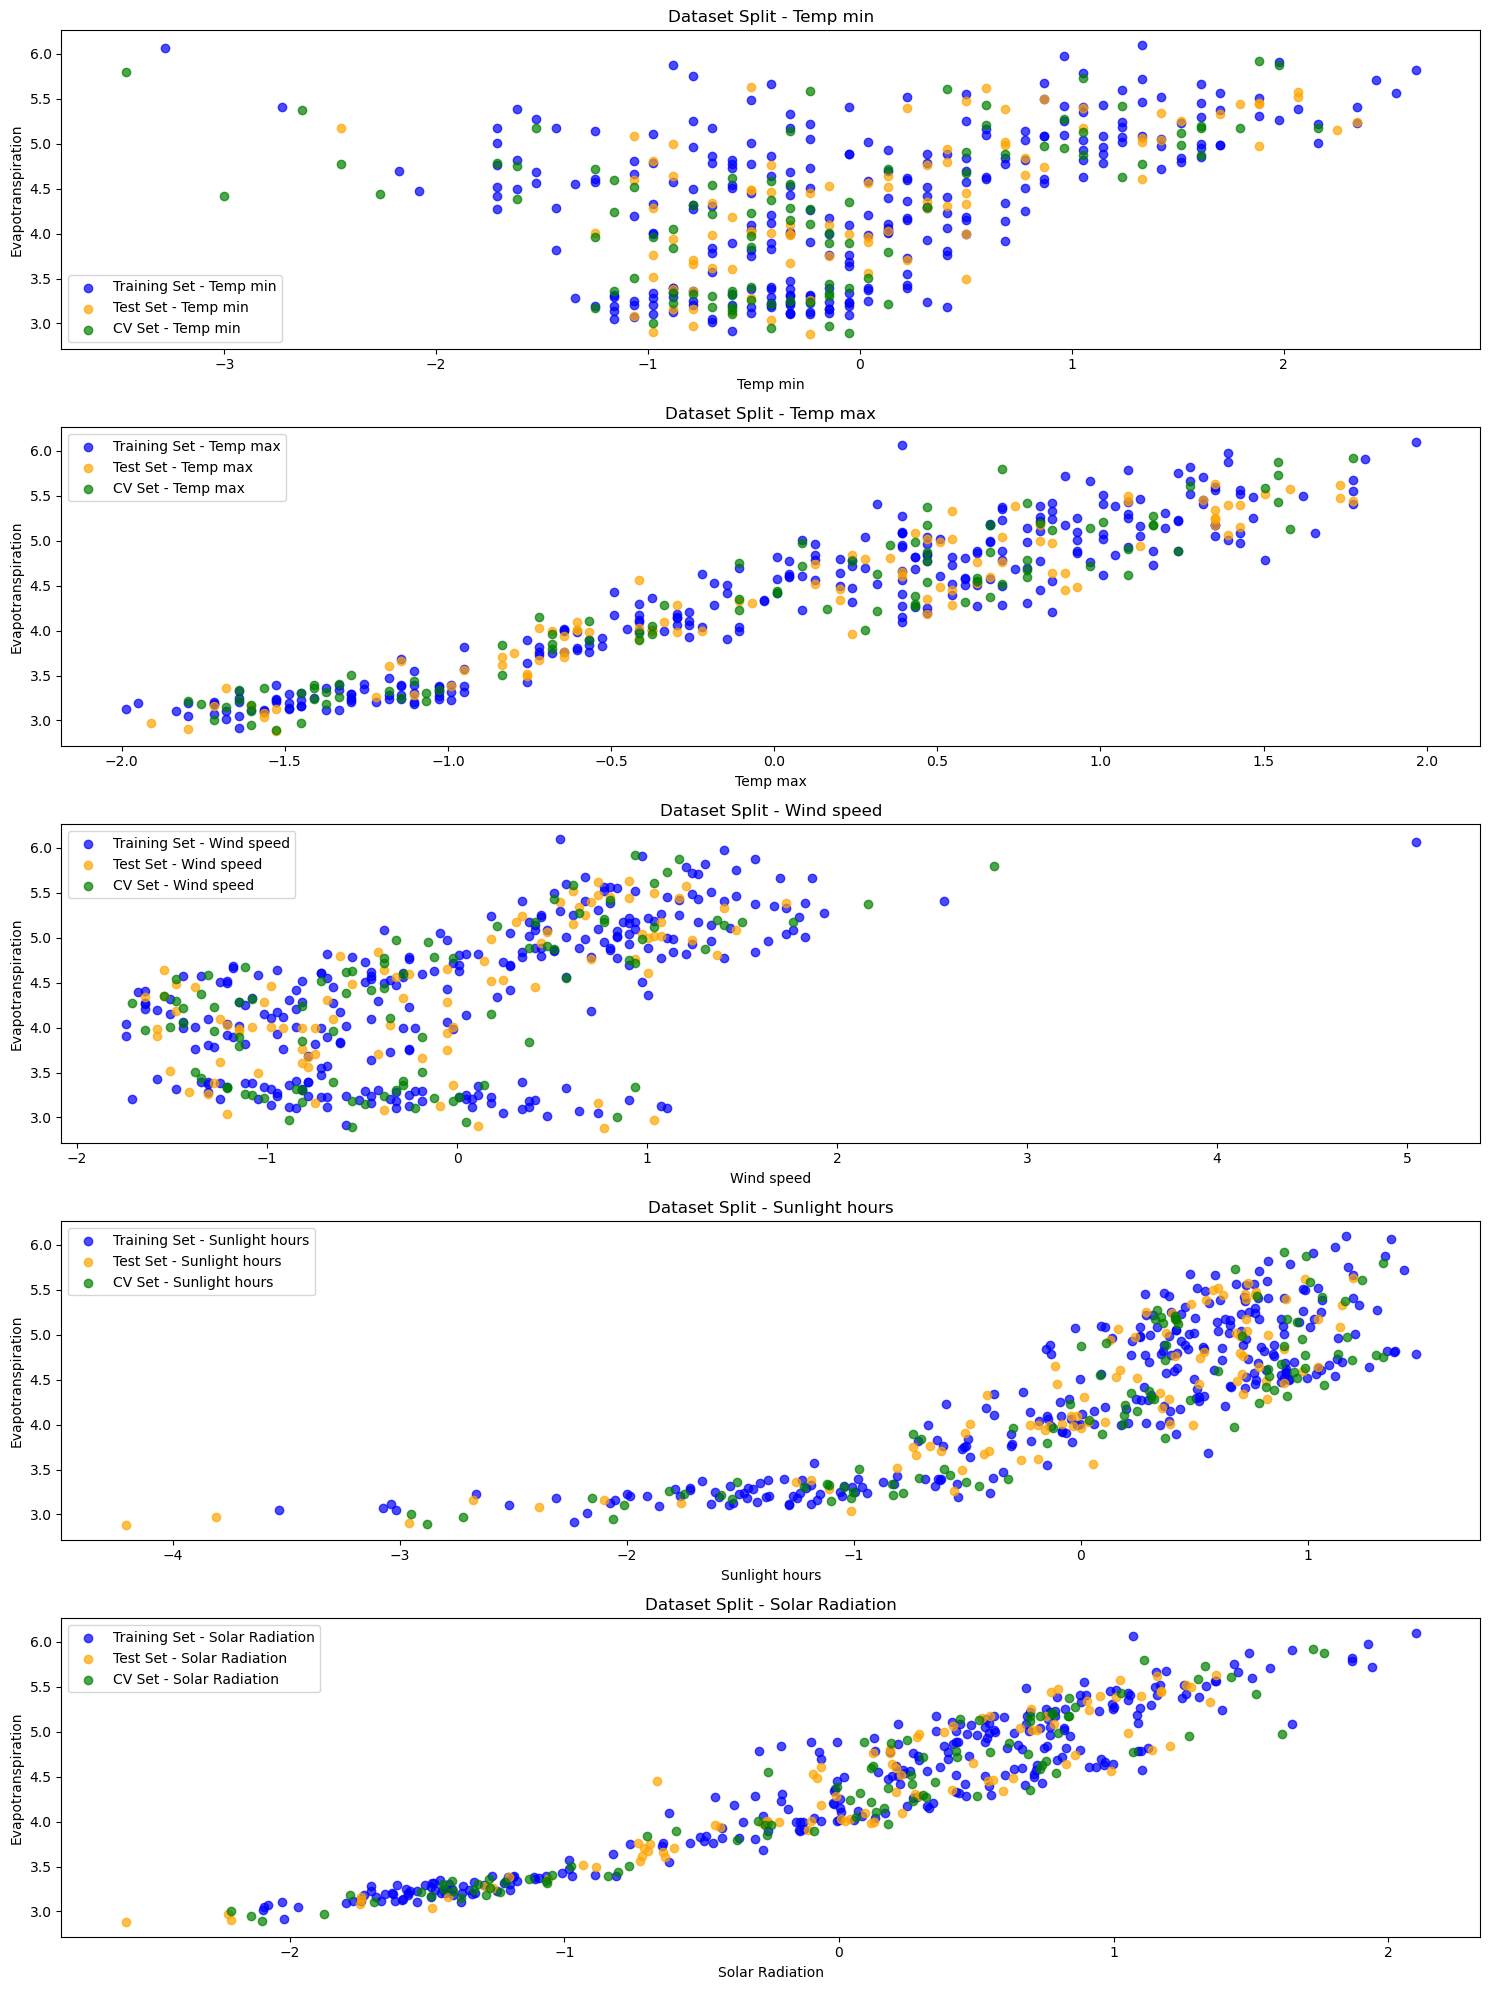

In [10]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 2s 14ms/step - loss: 17.3143 - mae: 4.1212
Epoch 2/150
9/9 [==============================] - 0s 15ms/step - loss: 16.1374 - mae: 3.9724
Epoch 3/150
9/9 [==============================] - 0s 6ms/step - loss: 15.0033 - mae: 3.8204
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 13.9132 - mae: 3.6677
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: 12.8942 - mae: 3.5187
Epoch 6/150
9/9 [==============================] - 0s 12ms/step - loss: 11.8881 - mae: 3.3619
Epoch 7/150
9/9 [==============================] - 0s 11ms/step - loss: 10.9378 - mae: 3.2070
Epoch 8/150
9/9 [==============================] - 0s 10ms/step - loss: 10.0414 - mae: 3.0540
Epoch 9/150
9/9 [==============================] - 0s 7ms/step - loss: 9.1894 - mae: 2.8975
Epoch 10/150
9/9 [==============================] - 0s 6ms/step - loss: 8.3937 - mae: 2.7426
Epoch 11/150
9/9 [==============================] - 0s 8ms/step - 

9/9 [==============================] - 0s 5ms/step - loss: 2.8330 - mae: 1.3379
Epoch 26/150
9/9 [==============================] - 0s 5ms/step - loss: 2.6238 - mae: 1.2812
Epoch 27/150
9/9 [==============================] - 0s 5ms/step - loss: 2.4241 - mae: 1.2258
Epoch 28/150
9/9 [==============================] - 0s 6ms/step - loss: 2.2529 - mae: 1.1787
Epoch 29/150
9/9 [==============================] - 0s 5ms/step - loss: 2.1093 - mae: 1.1339
Epoch 30/150
9/9 [==============================] - 0s 5ms/step - loss: 1.9671 - mae: 1.0906
Epoch 31/150
9/9 [==============================] - 0s 5ms/step - loss: 1.8484 - mae: 1.0526
Epoch 32/150
9/9 [==============================] - 0s 4ms/step - loss: 1.7431 - mae: 1.0174
Epoch 33/150
9/9 [==============================] - 0s 5ms/step - loss: 1.6463 - mae: 0.9828
Epoch 34/150
9/9 [==============================] - 0s 5ms/step - loss: 1.5597 - mae: 0.9511
Epoch 35/150
9/9 [==============================] - 0s 9ms/step - loss: 1.4798 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.2711 - mae: 0.3094
Epoch 114/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2672 - mae: 0.3068
Epoch 115/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2628 - mae: 0.3034
Epoch 116/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2589 - mae: 0.3000
Epoch 117/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2550 - mae: 0.2965
Epoch 118/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2511 - mae: 0.2934
Epoch 119/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2474 - mae: 0.2904
Epoch 120/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2435 - mae: 0.2875
Epoch 121/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2398 - mae: 0.2845
Epoch 122/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2362 - mae: 0.2814
Epoch 123/150
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1713 - mae: 0.1617
Epoch 138/150
9/9 [==============================] - 0s 4ms/step - loss: 0.1686 - mae: 0.1593
Epoch 139/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1659 - mae: 0.1568
Epoch 140/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1631 - mae: 0.1549
Epoch 141/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1604 - mae: 0.1523
Epoch 142/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1579 - mae: 0.1499
Epoch 143/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1553 - mae: 0.1474
Epoch 144/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1529 - mae: 0.1452
Epoch 145/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1504 - mae: 0.1433
Epoch 146/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1479 - mae: 0.1409
Epoch 147/150
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 9.5723 - mae: 2.7108
Epoch 12/150
9/9 [==============================] - 0s 9ms/step - loss: 8.9235 - mae: 2.5821
Epoch 13/150
9/9 [==============================] - 0s 7ms/step - loss: 8.3078 - mae: 2.4525
Epoch 14/150
9/9 [==============================] - 0s 6ms/step - loss: 7.7380 - mae: 2.3239
Epoch 15/150
9/9 [==============================] - 0s 5ms/step - loss: 7.2079 - mae: 2.1952
Epoch 16/150
9/9 [==============================] - 0s 5ms/step - loss: 6.7284 - mae: 2.0749
Epoch 17/150
9/9 [==============================] - 0s 6ms/step - loss: 6.2780 - mae: 1.9511
Epoch 18/150
9/9 [==============================] - 0s 5ms/step - loss: 5.8754 - mae: 1.8370
Epoch 19/150
9/9 [==============================] - 0s 4ms/step - loss: 5.5110 - mae: 1.7293
Epoch 20/150
9/9 [==============================] - 0s 5ms/step - loss: 5.1750 - mae: 1.6271
Epoch 21/150
9/9 [==============================] - 0s 6ms/step - loss: 4.8810 - ma

9/9 [==============================] - 0s 7ms/step - loss: 0.3357 - mae: 0.1896
Epoch 100/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3247 - mae: 0.1854
Epoch 101/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3141 - mae: 0.1815
Epoch 102/150
9/9 [==============================] - 0s 5ms/step - loss: 0.3040 - mae: 0.1779
Epoch 103/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2940 - mae: 0.1738
Epoch 104/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2845 - mae: 0.1703
Epoch 105/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2752 - mae: 0.1661
Epoch 106/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2663 - mae: 0.1622
Epoch 107/150
9/9 [==============================] - 0s 9ms/step - loss: 0.2577 - mae: 0.1589
Epoch 108/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2492 - mae: 0.1551
Epoch 109/150
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0679 - mae: 0.0613
Epoch 124/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0656 - mae: 0.0611
Epoch 125/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0634 - mae: 0.0616
Epoch 126/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0613 - mae: 0.0615
Epoch 127/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0593 - mae: 0.0609
Epoch 128/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0574 - mae: 0.0606
Epoch 129/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0607
Epoch 130/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0539 - mae: 0.0606
Epoch 131/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0523 - mae: 0.0603
Epoch 132/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0508 - mae: 0.0601
Epoch 133/150
9/9 [==============================] - 0s 8ms/step - loss: 0

### Computing the errors on the train, cross validation and test sets

In [12]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 8ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.03
Model 2: Training MSE: 0.03, CV MSE: 0.04
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [13]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 14ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [14]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.99          3.947490
1           4.35          4.386656
2           3.56          3.606562
3           3.99          3.959391
4           4.03          3.857345
5           5.02          5.002803
6           5.04          5.107121

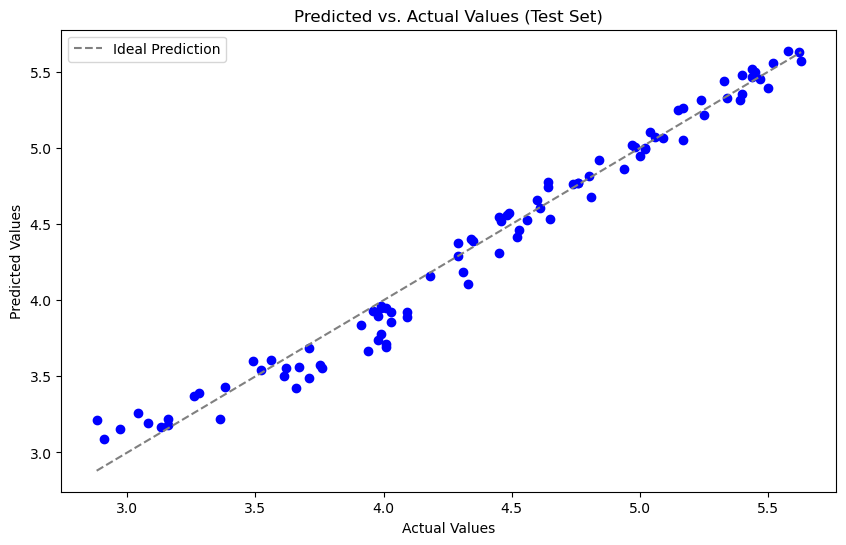

In [15]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [16]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12034891208462292
RAE: 0.14684659419937646
MAE: 0.09395857189012609
R2: 0.9744921524350757


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [17]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [18]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [19]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 2s 11ms/step - loss: 19.9880 - mae: 4.2920
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 18.7234 - mae: 4.1559
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 17.5814 - mae: 4.0248
Epoch 4/300
9/9 [==============================] - 0s 12ms/step - loss: 16.4545 - mae: 3.8927
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 15.4162 - mae: 3.7640
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 14.3813 - mae: 3.6331
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 13.4191 - mae: 3.5045
Epoch 8/300
9/9 [==============================] - 0s 7ms/step - loss: 12.4756 - mae: 3.3739
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 11.5656 - mae: 3.2423
Epoch 10/300
9/9 [==============================] - 0s 8ms/step - loss: 10.7081 - mae: 3.1124
Epoch 11/300
9/9 [==============================] - 0s 7ms/step - 

9/9 [==============================] - 0s 6ms/step - loss: 0.0374 - mae: 0.1550
Epoch 176/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0371 - mae: 0.1543
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0367 - mae: 0.1532
Epoch 178/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0363 - mae: 0.1528
Epoch 179/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0359 - mae: 0.1521
Epoch 180/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0355 - mae: 0.1510
Epoch 181/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0351 - mae: 0.1504
Epoch 182/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0349 - mae: 0.1499
Epoch 183/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0345 - mae: 0.1492
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0343 - mae: 0.1489
Epoch 185/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 1.5117 - mae: 0.9327
Epoch 50/300
9/9 [==============================] - 0s 6ms/step - loss: 1.4819 - mae: 0.9227
Epoch 51/300
9/9 [==============================] - 0s 7ms/step - loss: 1.4498 - mae: 0.9128
Epoch 52/300
9/9 [==============================] - 0s 6ms/step - loss: 1.4192 - mae: 0.9032
Epoch 53/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3875 - mae: 0.8930
Epoch 54/300
9/9 [==============================] - 0s 6ms/step - loss: 1.3561 - mae: 0.8831
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 1.3259 - mae: 0.8735
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2945 - mae: 0.8629
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 1.2640 - mae: 0.8527
Epoch 58/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2321 - mae: 0.8419
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 1.2007 - ma

9/9 [==============================] - 0s 9ms/step - loss: 0.0675 - mae: 0.1286
Epoch 224/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0672 - mae: 0.1283
Epoch 225/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.1279
Epoch 226/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0667 - mae: 0.1278
Epoch 227/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0665 - mae: 0.1277
Epoch 228/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0662 - mae: 0.1270
Epoch 229/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0660 - mae: 0.1270
Epoch 230/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0657 - mae: 0.1265
Epoch 231/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0655 - mae: 0.1263
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.1259
Epoch 233/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 15.9668 - mae: 3.8415
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss: 15.0297 - mae: 3.7203
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 14.1560 - mae: 3.5999
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 13.2893 - mae: 3.4790
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 12.4593 - mae: 3.3582
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 11.6616 - mae: 3.2386
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 10.8947 - mae: 3.1176
Epoch 17/300
9/9 [==============================] - 0s 6ms/step - loss: 10.1606 - mae: 2.9972
Epoch 18/300
9/9 [==============================] - 0s 7ms/step - loss: 9.4439 - mae: 2.8764
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 8.7761 - mae: 2.7583
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 8.1

9/9 [==============================] - 0s 8ms/step - loss: 0.4867 - mae: 0.4173
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4730 - mae: 0.4081
Epoch 100/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4607 - mae: 0.3995
Epoch 101/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4478 - mae: 0.3908
Epoch 102/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4357 - mae: 0.3826
Epoch 103/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4254 - mae: 0.3751
Epoch 104/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4136 - mae: 0.3670
Epoch 105/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4034 - mae: 0.3596
Epoch 106/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3934 - mae: 0.3525
Epoch 107/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3841 - mae: 0.3453
Epoch 108/300
9/9 [==============================] - 0s 6ms/step - loss: 0.

9/9 [==============================] - 0s 5ms/step - loss: 0.0827 - mae: 0.1111
Epoch 273/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0822 - mae: 0.1110
Epoch 274/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.1108
Epoch 275/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0811 - mae: 0.1108
Epoch 276/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0806 - mae: 0.1108
Epoch 277/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0802 - mae: 0.1104
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0797 - mae: 0.1103
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0792 - mae: 0.1104
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0787 - mae: 0.1103
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0782 - mae: 0.1102
Epoch 282/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.2120 - mae: 0.1488
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2090 - mae: 0.1475
Epoch 148/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2062 - mae: 0.1461
Epoch 149/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2034 - mae: 0.1450
Epoch 150/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2007 - mae: 0.1439
Epoch 151/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1979 - mae: 0.1424
Epoch 152/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1953 - mae: 0.1413
Epoch 153/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1928 - mae: 0.1404
Epoch 154/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1902 - mae: 0.1394
Epoch 155/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1878 - mae: 0.1384
Epoch 156/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 4.8881 - mae: 1.6025
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 4.5833 - mae: 1.5032
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 4.3052 - mae: 1.4117
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 4.0660 - mae: 1.3349
Epoch 24/300
9/9 [==============================] - 0s 5ms/step - loss: 3.8595 - mae: 1.2696
Epoch 25/300
9/9 [==============================] - 0s 5ms/step - loss: 3.6680 - mae: 1.2105
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 3.5060 - mae: 1.1579
Epoch 27/300
9/9 [==============================] - 0s 8ms/step - loss: 3.3490 - mae: 1.1070
Epoch 28/300
9/9 [==============================] - 0s 6ms/step - loss: 3.2086 - mae: 1.0630
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 3.0803 - mae: 1.0228
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 2.9592 - ma

9/9 [==============================] - 0s 11ms/step - loss: 0.1775 - mae: 0.1197
Epoch 109/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1732 - mae: 0.1196
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1690 - mae: 0.1195
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1649 - mae: 0.1194
Epoch 112/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1610 - mae: 0.1195
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1572 - mae: 0.1196
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1536 - mae: 0.1197
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1500 - mae: 0.1195
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1468 - mae: 0.1199
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1435 - mae: 0.1204
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.0456 - mae: 0.1290
Epoch 283/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.1295
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0462 - mae: 0.1310
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.1307
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0456 - mae: 0.1301
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.1288
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.1280
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.1287
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0452 - mae: 0.1295
Epoch 291/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0455 - mae: 0.1303
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 9ms/step - loss: 0.0845 - mae: 0.1261
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0835 - mae: 0.1265
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0825 - mae: 0.1267
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0815 - mae: 0.1271
Epoch 160/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0806 - mae: 0.1273
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0798 - mae: 0.1274
Epoch 162/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0789 - mae: 0.1275
Epoch 163/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0780 - mae: 0.1275
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0773 - mae: 0.1275
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0766 - mae: 0.1285
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss:

In [20]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.02
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [25]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 2
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [26]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.99          4.079457
1           4.35          4.727469
2           3.56          3.502116
3           3.99          4.060038
4           4.03          3.954950
5           5.02          4.849966
6           5.04          4.915143

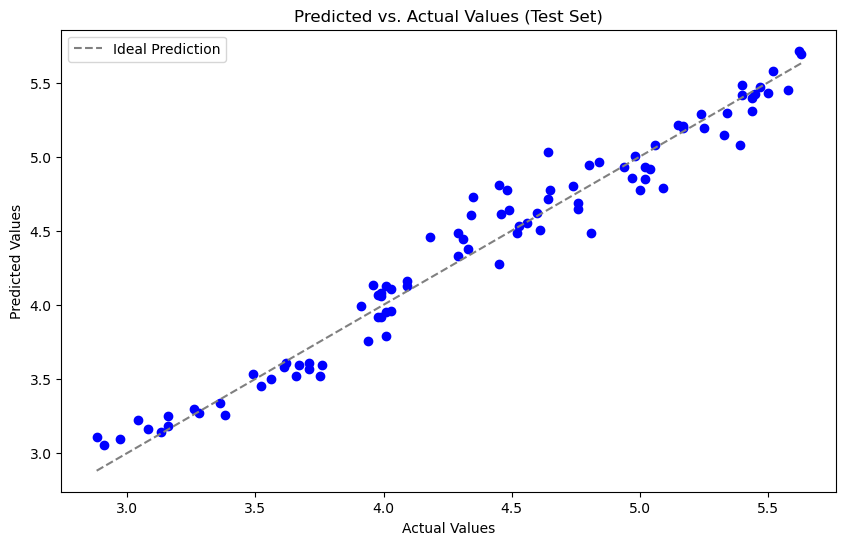

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14370922377947942
RAE: 0.17481139040606627
MAE: 0.11185161414353742
R2: 0.9636287051384713


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [29]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [30]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [31]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 20.6100 - mae: 4.3851
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 19.5886 - mae: 4.2638
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 18.6120 - mae: 4.1442
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 17.6934 - mae: 4.0267
Epoch 5/300
9/9 [==============================] - 0s 13ms/step - loss: 16.8342 - mae: 3.9113
Epoch 6/300
9/9 [==============================] - 0s 11ms/step - loss: 16.0417 - mae: 3.7988
Epoch 7/300
9/9 [==============================] - 0s 9ms/step - loss: 15.2670 - mae: 3.6876
Epoch 8/300
9/9 [==============================] - 0s 7ms/step - loss: 14.5447 - mae: 3.5791
Epoch 9/300
9/9 [==============================] - 0s 9ms/step - loss: 13.8706 - mae: 3.4725
Epoch 10/300
9/9 [==============================] - 0s 9ms/step - loss: 13.2043 - mae: 3.3688
Epoch 11/300
9/9 [==============================] - 0s 8ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0309 - mae: 0.1327
Epoch 176/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0307 - mae: 0.1323
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0306 - mae: 0.1319
Epoch 178/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0305 - mae: 0.1314
Epoch 179/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0304 - mae: 0.1312
Epoch 180/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0302 - mae: 0.1309
Epoch 181/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0301 - mae: 0.1306
Epoch 182/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0300 - mae: 0.1299
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0298 - mae: 0.1297
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0297 - mae: 0.1293
Epoch 185/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.7039 - mae: 0.6181
Epoch 50/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6776 - mae: 0.6062
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - mae: 0.5947
Epoch 52/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6298 - mae: 0.5839
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6086 - mae: 0.5730
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5880 - mae: 0.5631
Epoch 55/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5682 - mae: 0.5530
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5489 - mae: 0.5427
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5304 - mae: 0.5326
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5138 - mae: 0.5229
Epoch 59/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4975 - ma

9/9 [==============================] - 0s 8ms/step - loss: 0.0764 - mae: 0.1150
Epoch 224/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0762 - mae: 0.1151
Epoch 225/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0760 - mae: 0.1147
Epoch 226/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0760 - mae: 0.1157
Epoch 227/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0756 - mae: 0.1149
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0754 - mae: 0.1146
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.1148
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0751 - mae: 0.1148
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0749 - mae: 0.1148
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0748 - mae: 0.1148
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 14ms/step - loss: 9.2371 - mae: 2.9116
Epoch 11/300
9/9 [==============================] - 0s 8ms/step - loss: 8.4883 - mae: 2.7752
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 7.7758 - mae: 2.6377
Epoch 13/300
9/9 [==============================] - 0s 6ms/step - loss: 7.0975 - mae: 2.4983
Epoch 14/300
9/9 [==============================] - 0s 6ms/step - loss: 6.4572 - mae: 2.3573
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 5.8701 - mae: 2.2217
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 5.3187 - mae: 2.0896
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 4.8107 - mae: 1.9561
Epoch 18/300
9/9 [==============================] - 0s 11ms/step - loss: 4.3655 - mae: 1.8343
Epoch 19/300
9/9 [==============================] - 0s 12ms/step - loss: 3.9645 - mae: 1.7154
Epoch 20/300
9/9 [==============================] - 0s 8ms/step - loss: 3.6127 -

9/9 [==============================] - 0s 4ms/step - loss: 0.0916 - mae: 0.1261
Epoch 186/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0908 - mae: 0.1257
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0902 - mae: 0.1251
Epoch 188/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0895 - mae: 0.1250
Epoch 189/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0888 - mae: 0.1245
Epoch 190/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0882 - mae: 0.1245
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0877 - mae: 0.1244
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0869 - mae: 0.1237
Epoch 193/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0863 - mae: 0.1233
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0857 - mae: 0.1230
Epoch 195/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 14ms/step - loss: 0.9280 - mae: 0.5426
Epoch 60/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8972 - mae: 0.5295
Epoch 61/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8662 - mae: 0.5164
Epoch 62/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8380 - mae: 0.5046
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8089 - mae: 0.4915
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7816 - mae: 0.4782
Epoch 65/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7556 - mae: 0.4657
Epoch 66/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7311 - mae: 0.4539
Epoch 67/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7058 - mae: 0.4416
Epoch 68/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6820 - mae: 0.4296
Epoch 69/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6593 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.0500 - mae: 0.1168
Epoch 234/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0496 - mae: 0.1168
Epoch 235/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0494 - mae: 0.1172
Epoch 236/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0491 - mae: 0.1178
Epoch 237/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0487 - mae: 0.1175
Epoch 238/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0485 - mae: 0.1173
Epoch 239/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0482 - mae: 0.1169
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0478 - mae: 0.1170
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0475 - mae: 0.1173
Epoch 242/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0473 - mae: 0.1171
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - los

9/9 [==============================] - 0s 13ms/step - loss: 0.3202 - mae: 0.1680
Epoch 109/300
9/9 [==============================] - 0s 9ms/step - loss: 0.3122 - mae: 0.1651
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3046 - mae: 0.1624
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2973 - mae: 0.1600
Epoch 112/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2901 - mae: 0.1575
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2831 - mae: 0.1555
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2763 - mae: 0.1534
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2699 - mae: 0.1516
Epoch 116/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2636 - mae: 0.1496
Epoch 117/300
9/9 [==============================] - 0s 7ms/step - loss: 0.2575 - mae: 0.1482
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 

9/9 [==============================] - 0s 7ms/step - loss: 0.0458 - mae: 0.1296
Epoch 283/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0456 - mae: 0.1291
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0456 - mae: 0.1293
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0455 - mae: 0.1293
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0455 - mae: 0.1294
Epoch 287/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0455 - mae: 0.1296
Epoch 288/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0454 - mae: 0.1295
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0454 - mae: 0.1293
Epoch 290/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0454 - mae: 0.1293
Epoch 291/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0455 - mae: 0.1298
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.0600 - mae: 0.1358
Epoch 157/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0598 - mae: 0.1361
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0594 - mae: 0.1362
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0592 - mae: 0.1369
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.1367
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0587 - mae: 0.1362
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.1366
Epoch 163/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.1371
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0581 - mae: 0.1370
Epoch 165/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0580 - mae: 0.1380
Epoch 166/300
9/9 [==============================] - 0s 6ms/step - loss: 

In [32]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.02
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [37]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 5
Training MSE: 0.01
Cross Validation MSE: 0.02
Test MSE: 0.01


In [38]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.99          4.170271
1           4.35          4.720729
2           3.56          3.661266
3           3.99          4.145368
4           4.03          4.091772
5           5.02          4.851469
6           5.04          4.922019

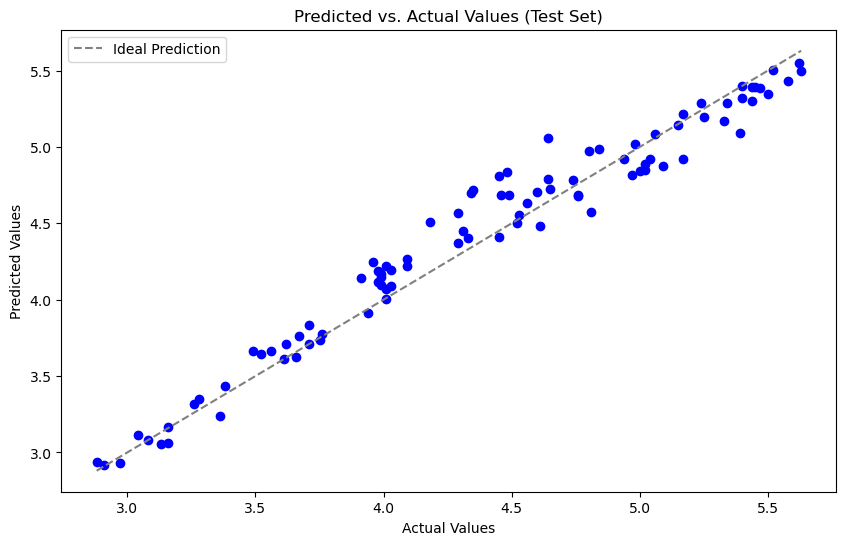

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15349261755229698
RAE: 0.18683337075242906
MAE: 0.11954377827437027
R2: 0.9585079913195607


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [41]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [42]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [43]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 5ms/step - loss: 21.5738 - mae: 4.5727
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 20.5741 - mae: 4.4596
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 19.6248 - mae: 4.3493
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 18.6836 - mae: 4.2363
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 17.7823 - mae: 4.1246
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 16.9058 - mae: 4.0128
Epoch 7/300
9/9 [==============================] - 0s 9ms/step - loss: 16.0568 - mae: 3.9002
Epoch 8/300
9/9 [==============================] - 0s 16ms/step - loss: 15.2207 - mae: 3.7866
Epoch 9/300
9/9 [==============================] - 0s 10ms/step - loss: 14.4153 - mae: 3.6721
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 13.6166 - mae: 3.5576
Epoch 11/300
9/9 [==============================] - 0s 8ms/step - 

9/9 [==============================] - 0s 10ms/step - loss: 0.0759 - mae: 0.2179
Epoch 176/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0755 - mae: 0.2173
Epoch 177/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0751 - mae: 0.2168
Epoch 178/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0747 - mae: 0.2162
Epoch 179/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0744 - mae: 0.2158
Epoch 180/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0740 - mae: 0.2152
Epoch 181/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.2147
Epoch 182/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0733 - mae: 0.2145
Epoch 183/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0731 - mae: 0.2142
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0727 - mae: 0.2136
Epoch 185/300
9/9 [==============================] - 0s 6ms/step - loss

9/9 [==============================] - 0s 7ms/step - loss: 1.1080 - mae: 0.8179
Epoch 50/300
9/9 [==============================] - 0s 6ms/step - loss: 1.0848 - mae: 0.8092
Epoch 51/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0627 - mae: 0.8009
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 1.0395 - mae: 0.7916
Epoch 53/300
9/9 [==============================] - 0s 5ms/step - loss: 1.0170 - mae: 0.7826
Epoch 54/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9947 - mae: 0.7738
Epoch 55/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9729 - mae: 0.7648
Epoch 56/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9518 - mae: 0.7559
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9308 - mae: 0.7469
Epoch 58/300
9/9 [==============================] - 0s 6ms/step - loss: 0.9091 - mae: 0.7373
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8882 - ma

9/9 [==============================] - 0s 9ms/step - loss: 0.0999 - mae: 0.1878
Epoch 224/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0997 - mae: 0.1878
Epoch 225/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0994 - mae: 0.1875
Epoch 226/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0994 - mae: 0.1876
Epoch 227/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0989 - mae: 0.1871
Epoch 228/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0986 - mae: 0.1873
Epoch 229/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0985 - mae: 0.1870
Epoch 230/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0983 - mae: 0.1867
Epoch 231/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0980 - mae: 0.1865
Epoch 232/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0978 - mae: 0.1865
Epoch 233/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 12.7666 - mae: 3.4736
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss: 12.0504 - mae: 3.3668
Epoch 12/300
9/9 [==============================] - 0s 6ms/step - loss: 11.3515 - mae: 3.2587
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 10.6873 - mae: 3.1509
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 10.0324 - mae: 3.0427
Epoch 15/300
9/9 [==============================] - 0s 9ms/step - loss: 9.4057 - mae: 2.9352
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 8.8103 - mae: 2.8266
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 8.2144 - mae: 2.7164
Epoch 18/300
9/9 [==============================] - 0s 8ms/step - loss: 7.6576 - mae: 2.6090
Epoch 19/300
9/9 [==============================] - 0s 7ms/step - loss: 7.1129 - mae: 2.4993
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 6.5954

9/9 [==============================] - 0s 4ms/step - loss: 0.1717 - mae: 0.2121
Epoch 186/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1707 - mae: 0.2116
Epoch 187/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1698 - mae: 0.2110
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1688 - mae: 0.2102
Epoch 189/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1679 - mae: 0.2098
Epoch 190/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1670 - mae: 0.2093
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1660 - mae: 0.2087
Epoch 192/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1651 - mae: 0.2081
Epoch 193/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1642 - mae: 0.2077
Epoch 194/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1633 - mae: 0.2075
Epoch 195/300
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.9567 - mae: 0.5549
Epoch 60/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9179 - mae: 0.5378
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8811 - mae: 0.5210
Epoch 62/300
9/9 [==============================] - 0s 12ms/step - loss: 0.8462 - mae: 0.5046
Epoch 63/300
9/9 [==============================] - 0s 8ms/step - loss: 0.8123 - mae: 0.4881
Epoch 64/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7801 - mae: 0.4725
Epoch 65/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7494 - mae: 0.4573
Epoch 66/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7206 - mae: 0.4420
Epoch 67/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6930 - mae: 0.4271
Epoch 68/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6668 - mae: 0.4133
Epoch 69/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6426 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0913 - mae: 0.1963
Epoch 234/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0910 - mae: 0.1967
Epoch 235/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0909 - mae: 0.1974
Epoch 236/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0907 - mae: 0.1968
Epoch 237/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0906 - mae: 0.1965
Epoch 238/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0903 - mae: 0.1969
Epoch 239/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0899 - mae: 0.1968
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0897 - mae: 0.1969
Epoch 241/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0896 - mae: 0.1971
Epoch 242/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0894 - mae: 0.1970
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss:

9/9 [==============================] - 0s 7ms/step - loss: 9.0587 - mae: 2.7309
Epoch 21/300
9/9 [==============================] - 0s 6ms/step - loss: 8.4821 - mae: 2.6189
Epoch 22/300
9/9 [==============================] - 0s 6ms/step - loss: 7.9373 - mae: 2.5084
Epoch 23/300
9/9 [==============================] - 0s 5ms/step - loss: 7.4098 - mae: 2.3973
Epoch 24/300
9/9 [==============================] - 0s 6ms/step - loss: 6.9186 - mae: 2.2879
Epoch 25/300
9/9 [==============================] - 0s 8ms/step - loss: 6.4501 - mae: 2.1787
Epoch 26/300
9/9 [==============================] - 0s 8ms/step - loss: 6.0093 - mae: 2.0712
Epoch 27/300
9/9 [==============================] - 0s 6ms/step - loss: 5.5991 - mae: 1.9659
Epoch 28/300
9/9 [==============================] - 0s 7ms/step - loss: 5.2252 - mae: 1.8654
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 4.8698 - mae: 1.7665
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 4.5492 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.3311 - mae: 0.2102
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3244 - mae: 0.2094
Epoch 110/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3179 - mae: 0.2081
Epoch 111/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3116 - mae: 0.2068
Epoch 112/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3055 - mae: 0.2057
Epoch 113/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2996 - mae: 0.2047
Epoch 114/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2939 - mae: 0.2042
Epoch 115/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2883 - mae: 0.2035
Epoch 116/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2830 - mae: 0.2028
Epoch 117/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2778 - mae: 0.2019
Epoch 118/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0908 - mae: 0.2126
Epoch 283/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0905 - mae: 0.2116
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0905 - mae: 0.2110
Epoch 285/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0907 - mae: 0.2119
Epoch 286/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0906 - mae: 0.2109
Epoch 287/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0903 - mae: 0.2104
Epoch 288/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0903 - mae: 0.2113
Epoch 289/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0903 - mae: 0.2116
Epoch 290/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0902 - mae: 0.2106
Epoch 291/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0902 - mae: 0.2105
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 0.1172 - mae: 0.2214
Epoch 157/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1168 - mae: 0.2211
Epoch 158/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1161 - mae: 0.2207
Epoch 159/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1154 - mae: 0.2222
Epoch 160/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1149 - mae: 0.2223
Epoch 161/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1142 - mae: 0.2223
Epoch 162/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1137 - mae: 0.2227
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1132 - mae: 0.2225
Epoch 164/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1125 - mae: 0.2221
Epoch 165/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1122 - mae: 0.2228
Epoch 166/300
9/9 [==============================] - 0s 11ms/step - loss: 

In [44]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.03
Model 2: Training MSE: 0.03, CV MSE: 0.03
Model 3: Training MSE: 0.03, CV MSE: 0.03
Model 4: Training MSE: 0.03, CV MSE: 0.03
Model 5: Training MSE: 0.03, CV MSE: 0.04
Model 6: Training MSE: 0.04, CV MSE: 0.04


In [56]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 2
Training MSE: 0.03
Cross Validation MSE: 0.03
Test MSE: 0.03


In [57]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.99          4.195404
1           4.35          4.677687
2           3.56          3.826527
3           3.99          4.454428
4           4.03          4.254239
5           5.02          4.946300
6           5.04          4.988003

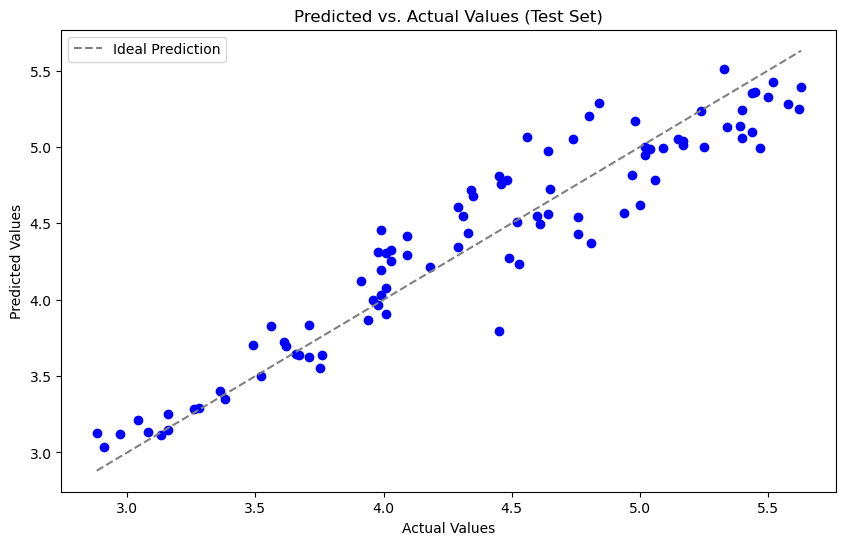

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23746721489962033
RAE: 0.29943421062024994
MAE: 0.1915904890972635
R2: 0.9006891285310437


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [60]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [61]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [68]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 2s 6ms/step - loss: 21.7228 - mae: 4.5726
Epoch 2/250
9/9 [==============================] - 0s 9ms/step - loss: 20.6926 - mae: 4.4577
Epoch 3/250
9/9 [==============================] - 0s 15ms/step - loss: 19.7132 - mae: 4.3452
Epoch 4/250
9/9 [==============================] - 0s 10ms/step - loss: 18.7779 - mae: 4.2357
Epoch 5/250
9/9 [==============================] - 0s 8ms/step - loss: 17.8801 - mae: 4.1255
Epoch 6/250
9/9 [==============================] - 0s 9ms/step - loss: 17.0377 - mae: 4.0197
Epoch 7/250
9/9 [==============================] - 0s 16ms/step - loss: 16.2040 - mae: 3.9124
Epoch 8/250
9/9 [==============================] - 0s 6ms/step - loss: 15.4120 - mae: 3.8066
Epoch 9/250
9/9 [==============================] - 0s 10ms/step - loss: 14.6415 - mae: 3.7014
Epoch 10/250
9/9 [==============================] - 0s 9ms/step - loss: 13.8993 - mae: 3.5958
Epoch 11/250
9/9 [==============================] - 0s 5ms/step -

9/9 [==============================] - 0s 6ms/step - loss: 0.0814 - mae: 0.2250
Epoch 176/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0802 - mae: 0.2232
Epoch 177/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0791 - mae: 0.2218
Epoch 178/250
9/9 [==============================] - 0s 13ms/step - loss: 0.0779 - mae: 0.2204
Epoch 179/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0769 - mae: 0.2190
Epoch 180/250
9/9 [==============================] - 0s 10ms/step - loss: 0.0756 - mae: 0.2174
Epoch 181/250
9/9 [==============================] - 0s 9ms/step - loss: 0.0747 - mae: 0.2162
Epoch 182/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0736 - mae: 0.2146
Epoch 183/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0726 - mae: 0.2131
Epoch 184/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0715 - mae: 0.2117
Epoch 185/250
9/9 [==============================] - 0s 5ms/step - loss

9/9 [==============================] - 0s 6ms/step - loss: 0.3380 - mae: 0.3893
Epoch 101/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3328 - mae: 0.3854
Epoch 102/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3274 - mae: 0.3815
Epoch 103/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3223 - mae: 0.3782
Epoch 104/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3174 - mae: 0.3749
Epoch 105/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3128 - mae: 0.3718
Epoch 106/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3076 - mae: 0.3680
Epoch 107/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3025 - mae: 0.3643
Epoch 108/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2976 - mae: 0.3609
Epoch 109/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2931 - mae: 0.3577
Epoch 110/250
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 8.0242 - mae: 2.7141
Epoch 25/250
9/9 [==============================] - 0s 4ms/step - loss: 7.4973 - mae: 2.6090
Epoch 26/250
9/9 [==============================] - 0s 6ms/step - loss: 6.9958 - mae: 2.5025
Epoch 27/250
9/9 [==============================] - 0s 5ms/step - loss: 6.5102 - mae: 2.3959
Epoch 28/250
9/9 [==============================] - 0s 11ms/step - loss: 6.0494 - mae: 2.2906
Epoch 29/250
9/9 [==============================] - 0s 7ms/step - loss: 5.6134 - mae: 2.1848
Epoch 30/250
9/9 [==============================] - 0s 5ms/step - loss: 5.1970 - mae: 2.0795
Epoch 31/250
9/9 [==============================] - 0s 4ms/step - loss: 4.8047 - mae: 1.9766
Epoch 32/250
9/9 [==============================] - 0s 6ms/step - loss: 4.4354 - mae: 1.8790
Epoch 33/250
9/9 [==============================] - 0s 5ms/step - loss: 4.0970 - mae: 1.7831
Epoch 34/250
9/9 [==============================] - 0s 5ms/step - loss: 3.7715 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.3289 - mae: 0.3082
Epoch 113/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3240 - mae: 0.3048
Epoch 114/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3195 - mae: 0.3017
Epoch 115/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3146 - mae: 0.2984
Epoch 116/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3103 - mae: 0.2955
Epoch 117/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3059 - mae: 0.2925
Epoch 118/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3015 - mae: 0.2895
Epoch 119/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2975 - mae: 0.2868
Epoch 120/250
9/9 [==============================] - 0s 7ms/step - loss: 0.2935 - mae: 0.2839
Epoch 121/250
9/9 [==============================] - 0s 6ms/step - loss: 0.2896 - mae: 0.2812
Epoch 122/250
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 7ms/step - loss: 4.0379 - mae: 1.2253
Epoch 37/250
9/9 [==============================] - 0s 4ms/step - loss: 3.8189 - mae: 1.1600
Epoch 38/250
9/9 [==============================] - 0s 3ms/step - loss: 3.6119 - mae: 1.0977
Epoch 39/250
9/9 [==============================] - 0s 4ms/step - loss: 3.4174 - mae: 1.0381
Epoch 40/250
9/9 [==============================] - 0s 4ms/step - loss: 3.2351 - mae: 0.9813
Epoch 41/250
9/9 [==============================] - 0s 4ms/step - loss: 3.0637 - mae: 0.9280
Epoch 42/250
9/9 [==============================] - 0s 8ms/step - loss: 2.8987 - mae: 0.8776
Epoch 43/250
9/9 [==============================] - 0s 6ms/step - loss: 2.7485 - mae: 0.8326
Epoch 44/250
9/9 [==============================] - 0s 8ms/step - loss: 2.6030 - mae: 0.7881
Epoch 45/250
9/9 [==============================] - 0s 12ms/step - loss: 2.4679 - mae: 0.7472
Epoch 46/250
9/9 [==============================] - 0s 9ms/step - loss: 2.3426 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0860 - mae: 0.1746
Epoch 211/250
9/9 [==============================] - 0s 7ms/step - loss: 0.0862 - mae: 0.1734
Epoch 212/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0860 - mae: 0.1734
Epoch 213/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0859 - mae: 0.1750
Epoch 214/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0860 - mae: 0.1743
Epoch 215/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0858 - mae: 0.1742
Epoch 216/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0858 - mae: 0.1755
Epoch 217/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0858 - mae: 0.1755
Epoch 218/250
9/9 [==============================] - 0s 6ms/step - loss: 0.0857 - mae: 0.1743
Epoch 219/250
9/9 [==============================] - 0s 8ms/step - loss: 0.0858 - mae: 0.1737
Epoch 220/250
9/9 [==============================] - 0s 7ms/step - loss: 0

In [69]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02


In [70]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 5ms/step
Selected Model: 2
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [71]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.99          4.178892
1           4.35          4.445959
2           3.56          3.488723
3           3.99          3.690644
4           4.03          3.647976
5           5.02          5.011321
6           5.04          5.133605

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.21226946622330903
RAE: 0.26997313225320513
MAE: 0.1727400631489961
R2: 0.9206467842293248


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.02


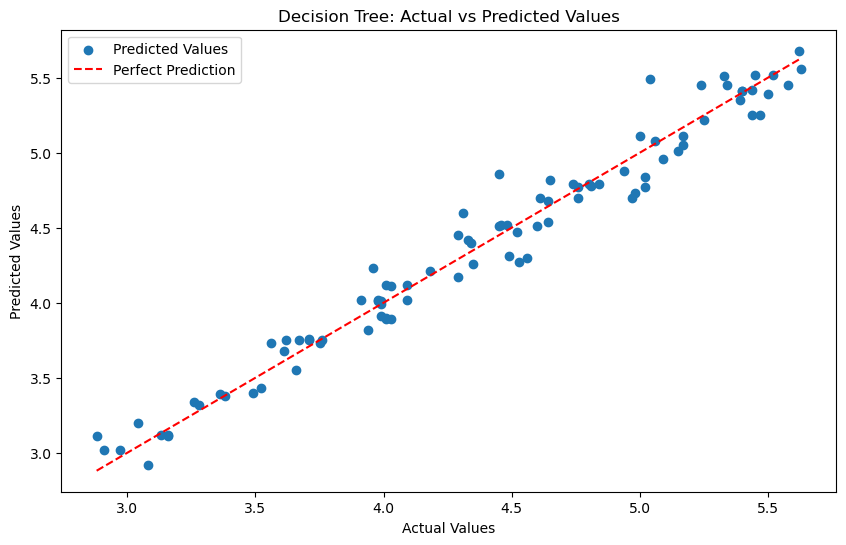

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13517701759898584
RAE: 0.16155490968716413
MAE: 0.10336956521739128
R2: 0.967819321519791


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.03


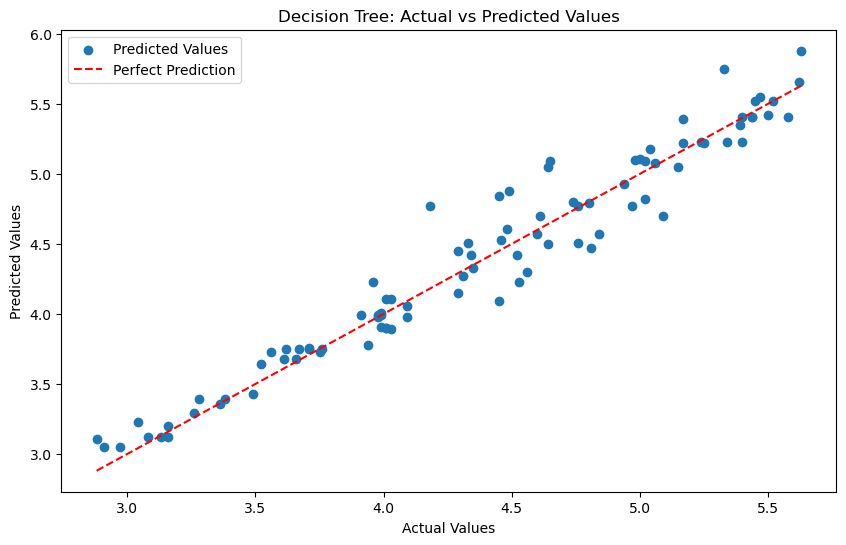

In [75]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17375645124088504
RAE: 0.19400179480835056
MAE: 0.12413043478260864
R2: 0.9468294256459291


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.04


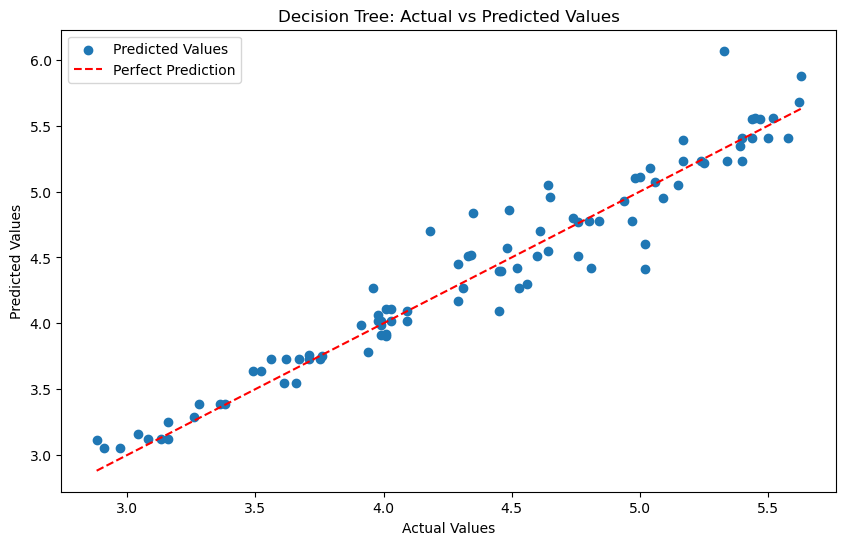

In [77]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19218141338894845
RAE: 0.2081017501227929
MAE: 0.13315217391304343
R2: 0.934955251080898


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.07
Mean Squared Error for Decision Tree: 0.08


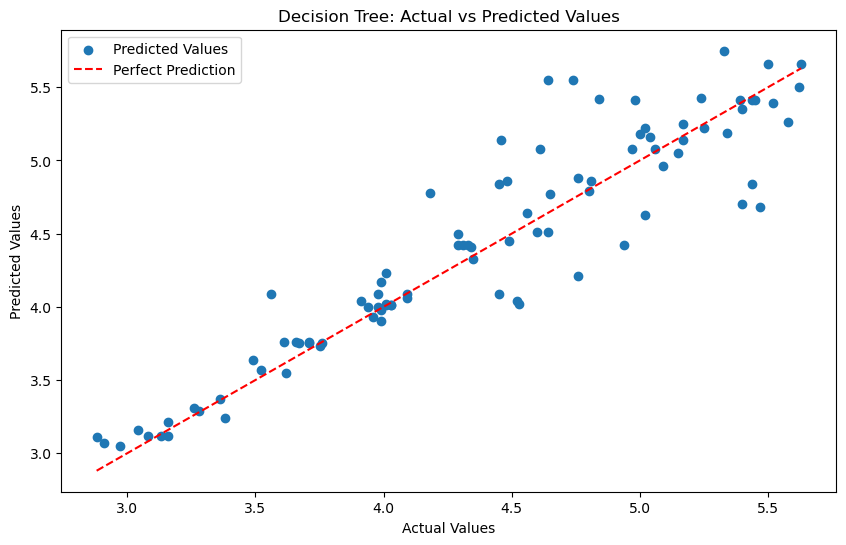

In [79]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.28469663488183955
RAE: 0.29219184507037055
MAE: 0.18695652173913047
R2: 0.8572572224786017


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.05
Mean Squared Error for Decision Tree: 0.07


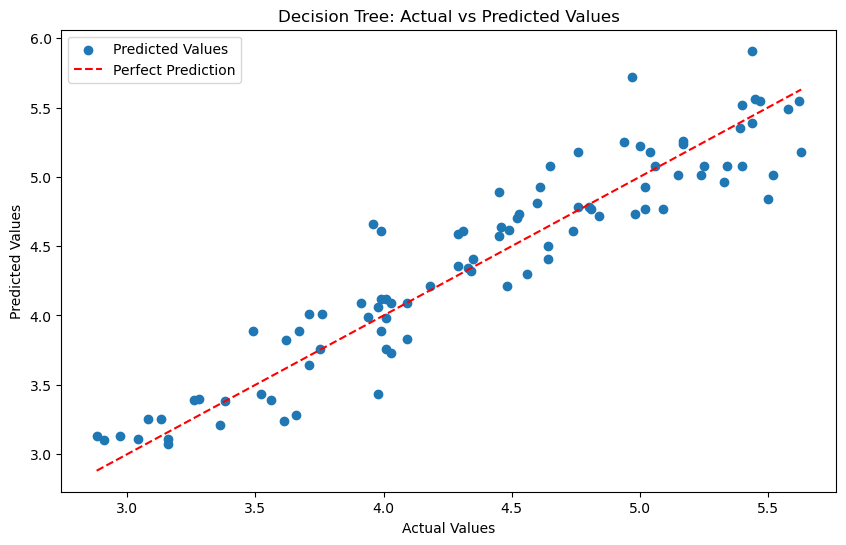

In [81]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.26105554964413225
RAE: 0.31733393406479765
MAE: 0.20304347826086952
R2: 0.8799795265390432


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.05
Mean Squared Error on Test Set for Random Forest: 0.01


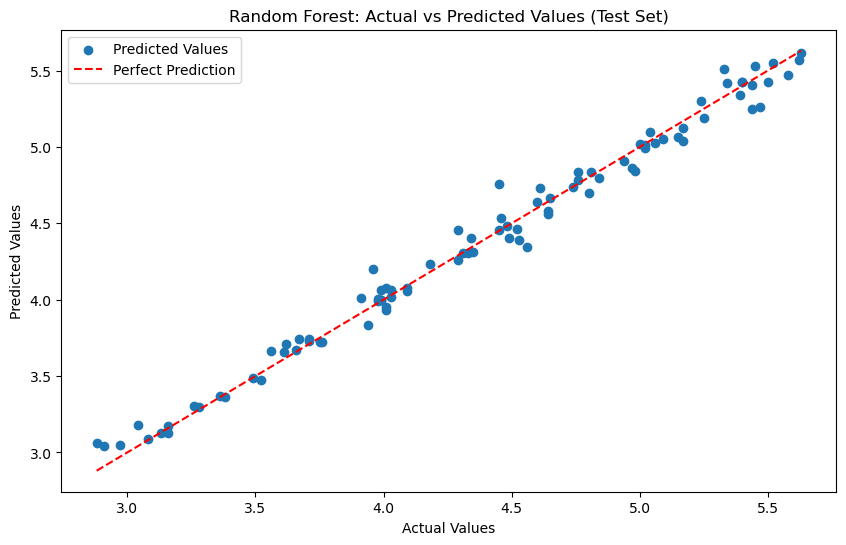

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [84]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Temp max           0.703201
Solar Radiation    0.187975
Wind speed         0.097114
Sunlight hours     0.008034
Temp min           0.003676
dtype: float64


In [85]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.08758715597223317
RAE: 0.10068897005328988
MAE: 0.06442499999999973
R2: 0.9864895341259757


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.05
Mean Squared Error on Test Set for Random Forest: 0.02


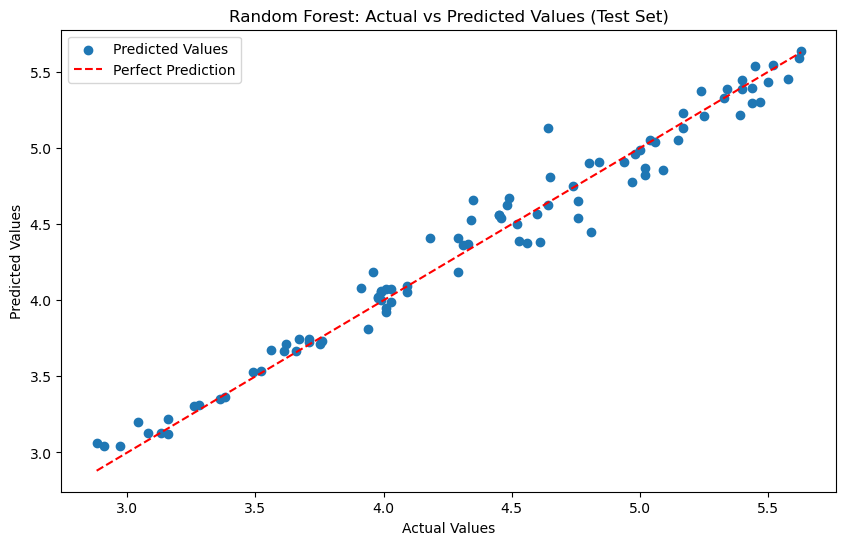

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1253161718804984
RAE: 0.1435324487316315
MAE: 0.09183804347826068
R2: 0.972343086275405


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.05
Mean Squared Error on Test Set for Random Forest: 0.02


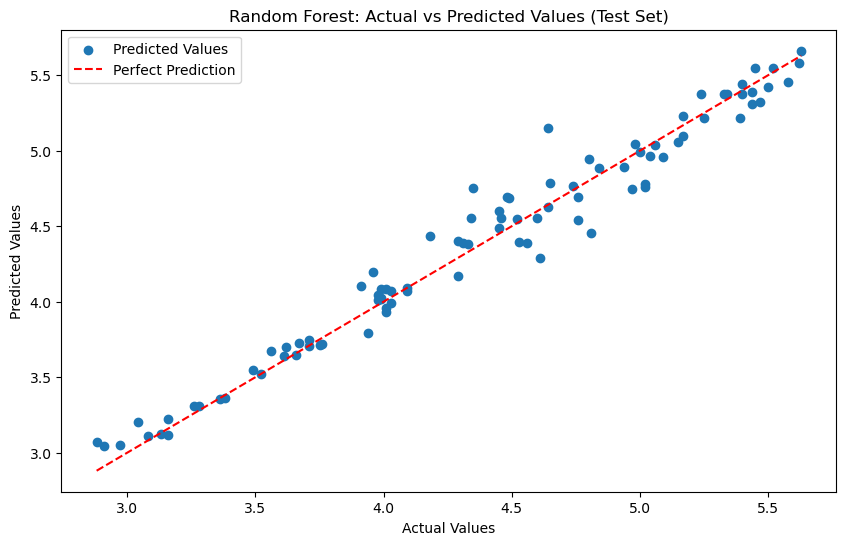

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13544445476314987
RAE: 0.1538067294234083
MAE: 0.09841195652173897
R2: 0.9676918616452963


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.05
Mean Squared Error on Test Set for Random Forest: 0.06


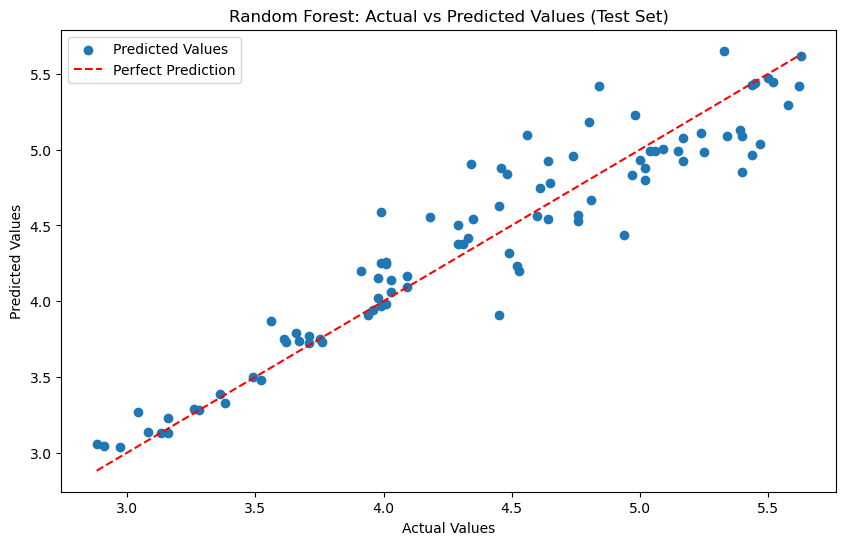

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23808842118916188
RAE: 0.27916212732798756
MAE: 0.17861956521739084
R2: 0.9001688610843549


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.05
Mean Squared Error on Test Set for Random Forest: 0.04


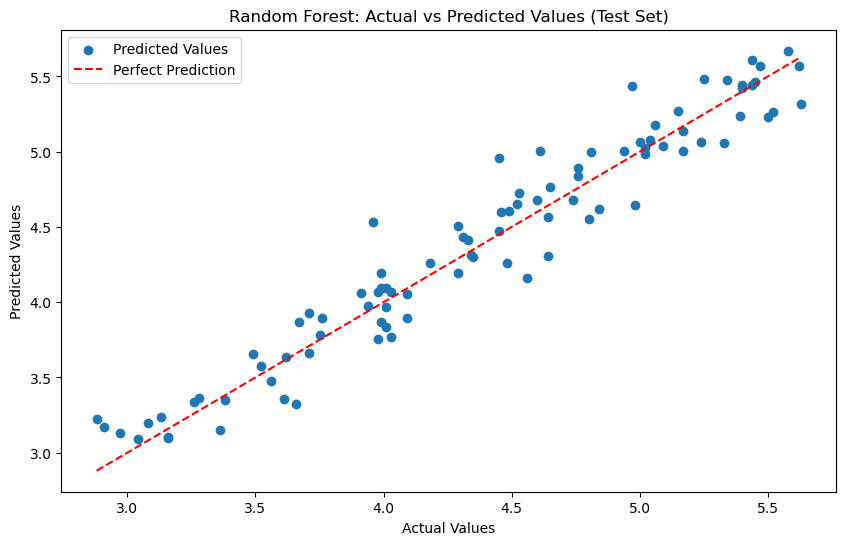

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [93]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18807922619493855
RAE: 0.23062260646057095
MAE: 0.1475619565217388
R2: 0.9377024260726643


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


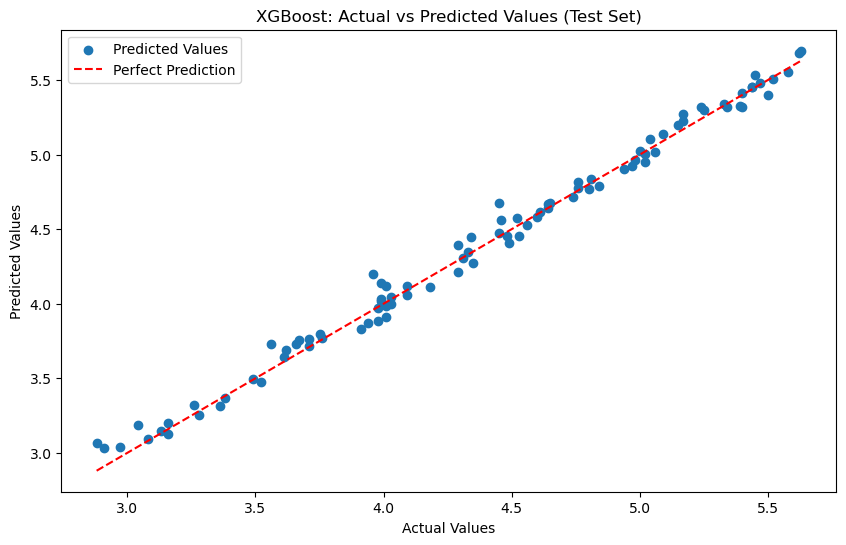

In [94]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.0721743278235871
RAE: 0.08590306301030226
MAE: 0.05496436036151384
R2: 0.9908260795215303


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.01


Text(0, 0.5, 'Predicted Values')

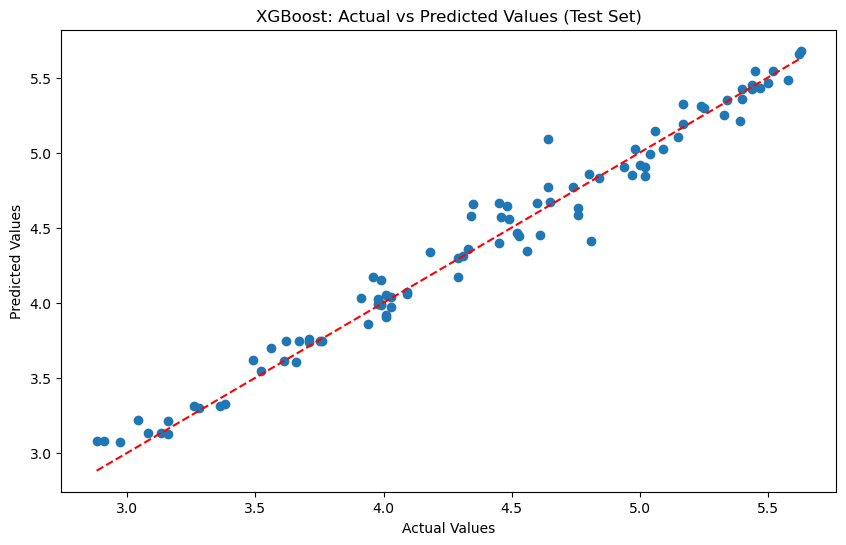

In [96]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [97]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11831852508753307
RAE: 0.1337640417186068
MAE: 0.08558780950048694
R2: 0.9753455697865936


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

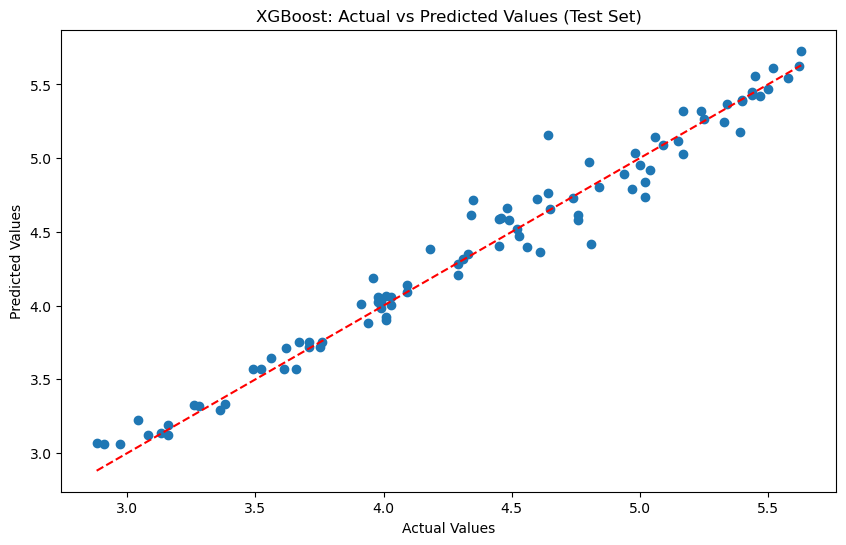

In [98]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12989754213087557
RAE: 0.14373610271951562
MAE: 0.09196834978849991
R2: 0.9702839320541639


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.05
Mean Squared Error on Test Set for XGBoost: 0.05


Text(0, 0.5, 'Predicted Values')

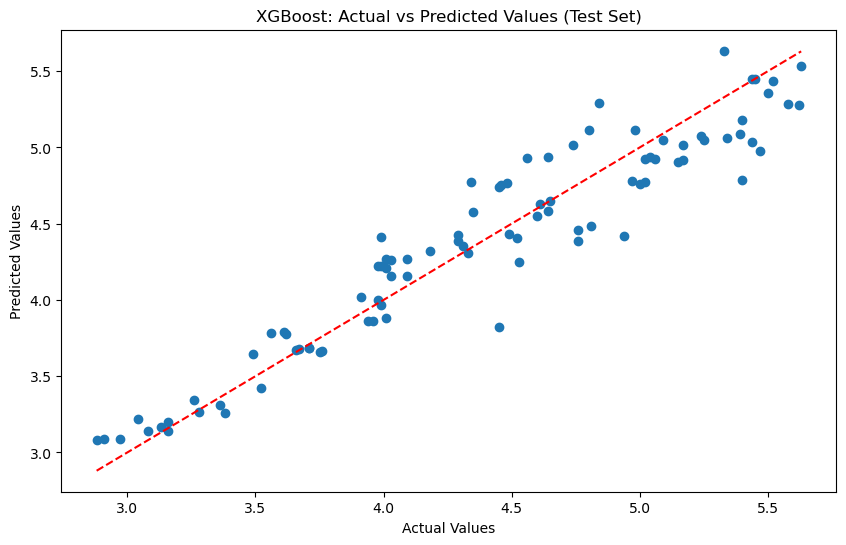

In [100]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [101]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23004673794489422
RAE: 0.28512127571729046
MAE: 0.1824324767485908
R2: 0.9067987720764783


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

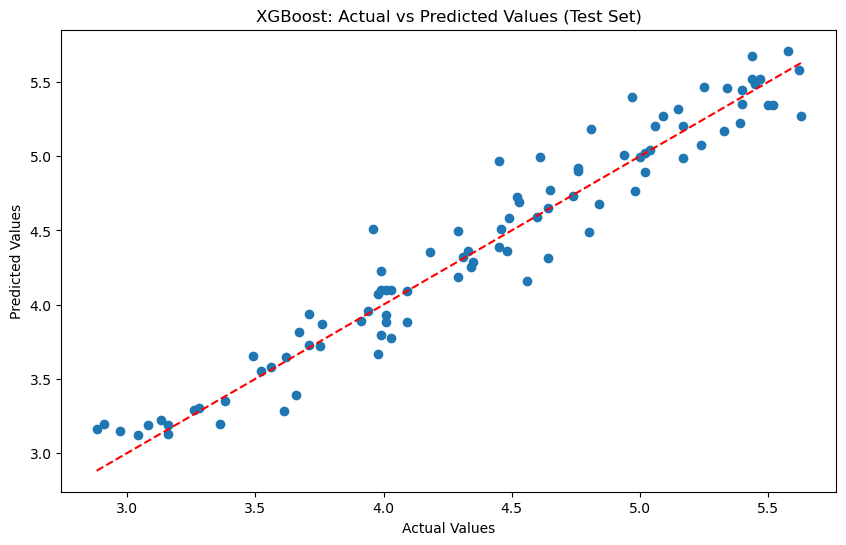

In [102]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [103]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.186019540834287
RAE: 0.2226002189563565
MAE: 0.1424288986040198
R2: 0.9390594160329796


### SVR
### Model 1: All input features

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


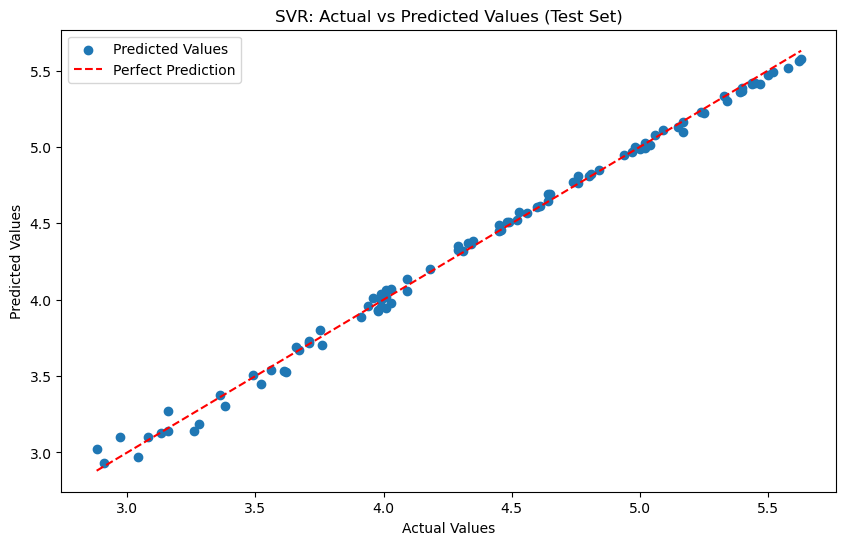

In [104]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [105]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.04551167337351317
RAE: 0.0540728700217557
MAE: 0.03459807612797976
R2: 0.9963521658617065


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


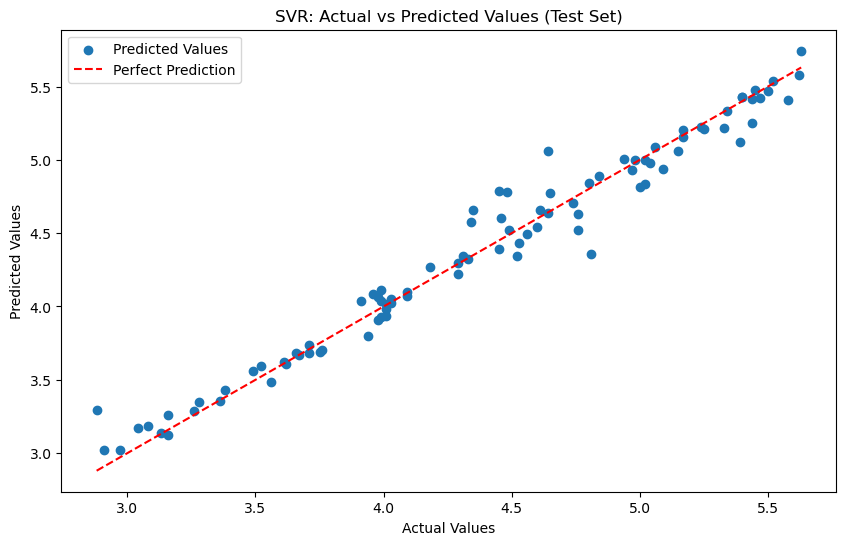

In [106]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [107]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13012071402440128
RAE: 0.1374382772585523
MAE: 0.08793873854997178
R2: 0.970181736308911


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


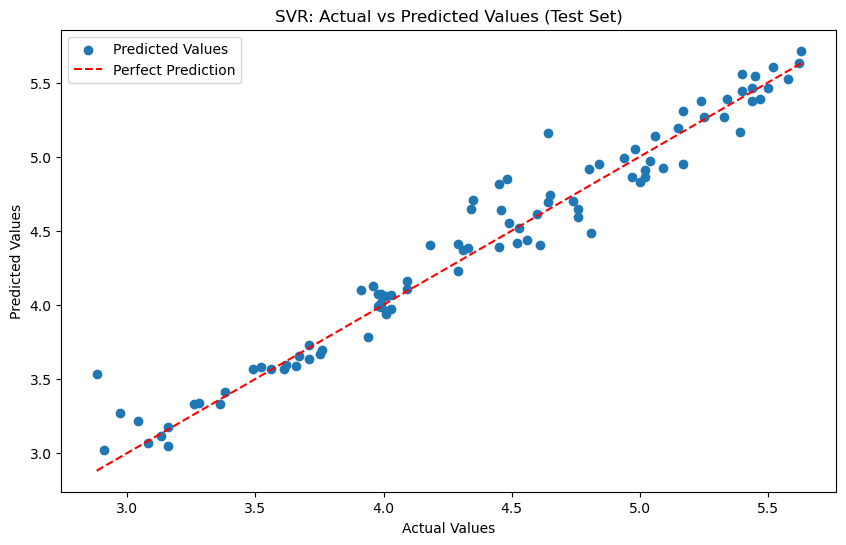

In [108]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [109]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15510155550945492
RAE: 0.17067748405943878
MAE: 0.10920656855174599
R2: 0.9576335785438782


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.05
Mean Squared Error on Test Set for SVR: 0.07


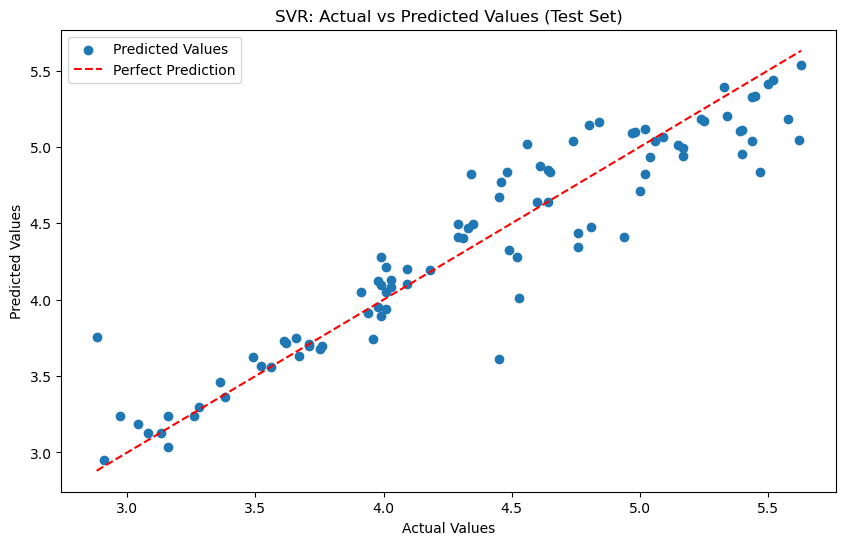

In [110]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [111]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.255273709678915
RAE: 0.28864148252742966
MAE: 0.18468485179645544
R2: 0.885237062822439


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.03
Mean Squared Error on Test Set for SVR: 0.03


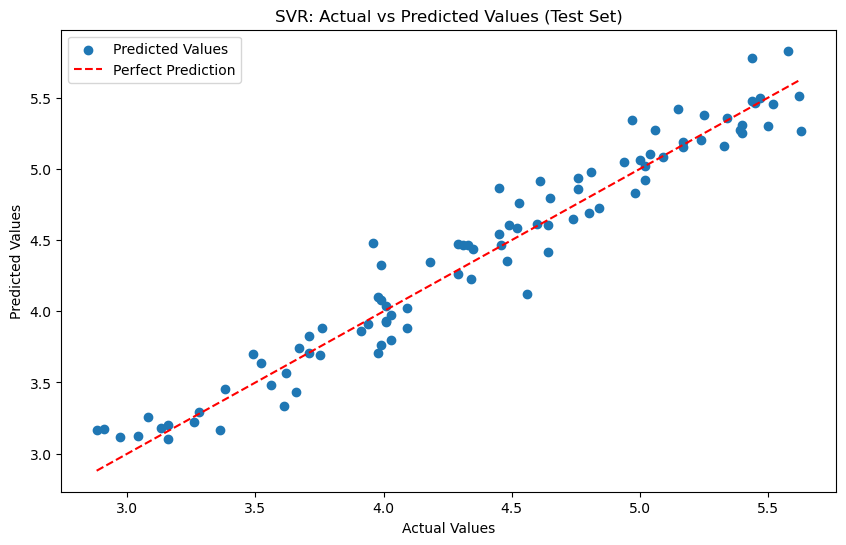

In [112]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [113]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.17364647709191267
RAE: 0.21240248726725391
MAE: 0.1359039648032001
R2: 0.9468967099183112
